In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import solve

# функция для проверки положительной определенности матрицы
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

# функция для проверки симметричности матрицы
def is_symmetric(x):
    return (abs(x - np.transpose(x)) < 0.00000001).all()

# функция для проверки матрицы на квадаратичность
def is_squared(x):
    return x.shape[0] == x.shape[1]



# функция для перемножения симметричных матриц через жирную точку(tr(xy))
def bullet(x,y):
    return np.trace(x.dot(y))




# План
1. Задача линейного программирования LP
2. Матрицы
3. Полуопределенное программирование SDP
4. Двойственность SDP
5. Отличия SDP от LP
6. Метод внутренней точки
7. SDP в комбинаторной оптимизации(задача MAXCUT)

## 1. Задача линейного программирования LP



***
**Задача лин. прогр. в канон. форме:**
$$LP:~c\cdot x=\sum_{j=1}^{n}c_jx_j\rightarrow min$$
$$s.t.~a_ix=b_i,~i=1,...,m;~x\in R_+^n=\{x\in R^n|x\geq 0\}$$
***
Тут $R_+^n$ - замкнутый выпуклый конус.


***
**Опр.** K - замкнутый выпуклый конус, если:
- $x,w\in K\Rightarrow \alpha x+\beta w\in K~\forall\alpha,\beta\geq 0$
- K - замкнутое множество
***


***
**Двойственная задача LP:**
$$LD:~y\cdot b=\sum_{i=1}^{m}y_i b_i\rightarrow max$$
$$s.t.~\sum_{i=1}^m y_i a_i+s=c;~s\in R_+^n$$
***

Пусть $x$ - допустимое решение LP, $(y,S)$ - допустимое решение LD, тогда **разрыв двойственности**: 
$c\cdot x-y\cdot b=(c-\sum_{i=1}^m y_i a_i)\cdot x=s\cdot x\geq 0$, так как $x\geq 0, s\geq 0$. Однако из теории двойственности LP известно, что если задача LP выполнима и имеет ограниченный оптимум, то LP и LD достигают своих оптимумов без разрыва двойственности, т.е.<br>
$\exists $ $x^*$ и $(y^*,S^*)$-решения LP и LD, такие что $c\cdot x^*-\sum_{i=1}^m y_i^* b_i=s^*\cdot x^*=0$. 

## 2. Матрицы

***
**Опр.** X - матрица $n\times n$. X - полож. полуопределенная матрица(psd), если $v^TXv\geq 0~\forall v\in R^n$.
***
***
**Опр.** X - матрица $n\times n$. X - полож. определенная матрица(pd), если $v^TXv> 0~\forall v\in R^n$.
***

Пусть:
- $S^n$ - множество симметричных матриц $n\times n$
- $S_+^n$ - множество симметричных полож. полуопределенных матриц $n\times n$
- $S_{++}^n$ - множество симметричных полож. определенных матриц $n\times n$

Пусть $X,Y\in S^n$. Тогда:
- $X\succeq 0\Leftrightarrow X\in S^n_+$
- $X\succ 0\Leftrightarrow X\in S^n_{++}$

***
**Утв. 2.1.** $S_+^n$ - замкнутый выпуклый конус в $R^{n^2}$ размерности $\frac{n(n+1)}{2}$.<br>
*Док-во(см. стр. 3).*
***

Св-ва симметричных матриц:
- если $X\in S^n$, то $X=QDQ^T$, где Q - **ортогональная**, D - **диагональная**
- если $X=QDQ^T$, то столбцы Q - n ортогональных собственных векторов X, а элементы диагонали D - собственные числа X
- $X \succeq 0\Leftrightarrow X=QDQ^T$, где элементы диагонали D $\geq 0$
- $X \succ 0\Leftrightarrow X=QDQ^T$, где элементы диагонали D $> 0$
- $X \succeq 0$ и $X_{ii}=0\Rightarrow X_{ij}=X_{ji}=0~\forall j=1,...,n$
- пусть 
$\begin{pmatrix}
  P& v\\
  v^T& d
\end{pmatrix}$
, где $P\succ 0$, v - вектор, d - скаляр. Тогда: $M\succ 0\Leftrightarrow d-v^TP^{-1}v>0$

## 3. Полуопределенное программирование SDP

Рассмотрим $X\in S^n$.

***
**Опр.** $C(X)$ - линейная фукнция от X, если $C(X)=C\bullet X=\sum_{i=1}^n \sum_{j=1}^n C_{ij}X_{ij}$.
***
$\rightarrow$ Если X симметрична, то без потерь общности можно считать C тоже симметричной матрицей.

Теперь определим задачу полуопределенного программирования:
***
**Задача полуопр. прогр.:**
$$SDP:~C\bullet X\rightarrow min$$
$$s.t.~A_i\bullet X=b_i,~i=1,...,m;~X\succeq 0~(X\in S^n_+),$$
где $C, A_1, ..., A_m$ - симметричные матрицы, b - вектор размерности m.
***

Видно, что SDP очень похожа на LP. В действительности, LP - частный случай SDP(это показывается тривиальным образом).

## 4. Двойственность SDP

***
**Двойственная задача SDP:**
$$SDD:~\sum_{i=1}^m y_i b_i\rightarrow max$$
$$s.t.~\sum_{i=1}^m y_i A_i + S=C;~S\succeq 0$$
***

Следующее утверждение показывает, что **слабая двойственность** справедлива для задач SDP и SDD:
***
**Утв. 4.1.** При заданном допустимом решении X задачи SDP и (y,S) задачи SDD **разрыв двойственности**: $C\bullet X-\sum_{i=1}^m y_ib_i=S\bullet X\geq 0$. Если $C\bullet X-\sum_{i=1}^m y_ib_i=0$, то X и (y,S) - оптимумы SDP и SDD соответственно, причем $S\bullet X=0$.<br>
*Док-во(см. стр. 10).*
***

В отличие от случая LP, в SDP для выполнения **сильной двойственности** необходимо выполнение определенного условия регулярности, называемого **условием Слейтера**:
***
**Теорема 4.1.** Пусть $z_P^*$ и $z_D^*$ - оптимальные значения целевых функций SDP и SDD соотвественно. Пусть $\exists$ допустимое решение $\hat{X}$ для SDP, $\hat{X}\succ 0$, и что $\exists$ допустимое решение $(\hat{y},\hat{S})$ для SDD, $\hat{S}\succ 0$. Тогда SDP и SDD достигают своих оптимальных значений, причем $z_P^*=z_D^*$.<br>
*Док-во(не приводим).*
***

## 5. Отличия SDP от LP

- может существовать конечный или бесконечный разрыв двойственности. SDP и SDD могут достигать или не достигать своих оптимумов(см. теорему 4.1)
- не существует конечного алгоритма решения SDP
- при рациональных входных данных SDP в допустимой области может не быть рациональных решений
- при рациональных входных данных размера L(двоичного кодирования), нормы любых возможных и/или оптимальных решений могут превышать $2^{2^L}$(или быть меньше $2^{-2^L}$)


## 6. Метод внутренней точки

В основе **метода внутренней точки** лежит барьерная функция, которая создает отталкивающую силу от границы допустимой области. Для SDP нужна барьерная функция, значение которой $\rightarrow +\infty$ по мере приближения точек X к границе полуопределенного конуса $S_+^n$.

***
Пусть $X\in S_+^n$. Тогда X имеет n собственных значений: $\lambda_1(X),...,\lambda_n(X)$ (с учетом кратности). Охарактеризуем внутренную часть $S_+^n$ следующим образом:
$$int~S_+^n=\{X\in S^n|\lambda_1(X)>0,...,\lambda_n(X)>0\}$$
Тогда естественная **барьерная функция** для отталкивания X от границы $S_+^n$ имеет вид:
$$-\sum_{j=1}^n \ln(\lambda_j(X))=-\ln(\prod_{j=1}^n\lambda_j(X))=-\ln(det(X))$$
***

Рассмотрим следующую задачу логарифмического барьера для SDP, параметризованную положительным параметром $\Theta$:
***
**Задача лог. барьера для SDP:**
$$BSDP(\Theta):~C\bullet X-\Theta\ln(det(X))\rightarrow min$$
$$s.t.~A_i\bullet X=b_i,~i=1,...,m;~X\succ 0$$
***

Пусть $f_{\Theta}(X)$ - целевая функция $BSDP(\Theta)$, т.е.:
$$f_{\Theta}(X)=C\bullet X-\Theta\ln(det(X)).$$
Тогда:
$$\nabla f_{\Theta}(X)=C-\Theta X^{-1}.$$
***
Значит, **условия Каруша-Куна-Таккера** для $BSDP(\Theta)$:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0\\
C-\Theta X^{-1}=\sum_{i=1}^m y_iA_i
\end{cases}
\end{equation*}
$$
***

Так как X симметрична, то ее можно представить как $X=LL^T$(разложение Холецкого). Затем определим: 
$$S=\Theta X^{-1}=\Theta (L^T)^{-1}L^{-1}\Rightarrow \frac{1}{\Theta}L^TSL=I.$$
***
Теперь можно переписать **условия Каруша-Куна-Таккера** для $BSDP(\Theta)$:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0,~X=LL^T\\
\sum_{i=1}^m y_iA_i+S=C\\
I - \frac{1}{\Theta}L^TSL=0
\end{cases}
\end{equation*}
$$
***
Из этой системы следует, что если (X,y,S) - ее решение, то X допустимо для SDP, (y,S) допустимо для SDD, и **разрыв двойственности** будет равен:
$$S\bullet X=\sum_{i=1}^n\sum_{j=1}^n S_{ij}X_{ij}=\sum_{j=1}^n(SX)_{jj}=\sum_{j=1}^n\Theta=n\Theta.$$
Это означает, что надо пробовать решать $BSDP(\Theta)$ при разных $\Theta$, т.ч. $\Theta\rightarrow 0$.

Однако обычно мы не можем решить точно решить данную систему. Поэтому мы определим $\beta$-приближенное решение условий Каруша-Куна-Таккера. Будем использовать следующую норму:
***
**Опр.** Норма Фробениуса: $||M||=\sqrt{M\bullet M}=\sqrt{\sum_{i=1}^n\sum_{j=1}^n M_{ij}^2}$.
***


Свойства нормы Фробениуса:
- $||M||=\sqrt{\sum_{j=1}^n (\lambda_j(M))^2}$, где $\lambda_1(M),...,\lambda_n(M)$ - собственные значения матрицы M
- если $\lambda$ - собственное значение матрицы M, то $|\lambda|\leq ||M||$
- $|tr(M)|\leq \sqrt{n}||M||$
- если $||M||<1$, то $I+M\succ 0$
- если $A,B\in S^n$, то $||AB||\leq ||A||\cdot ||B||$

***
Тогда $\beta$-**приближенное решение** $BSDP(\Theta)$ определяется как $\forall$ решение $(X,y,S)$ из системы:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0,~X=LL^T\\
\sum_{i=1}^m y_iA_i+S=C\\
||I - \frac{1}{\Theta}L^TSL||\leq \beta
\end{cases}
\end{equation*}
$$
***

***
**Утв. 6.1.** Если $(\overline{X},\overline{y},\overline{S})$ - $\beta$-**приближенное решение** $BSDP(\Theta)$ и $\beta < 1$, то $\overline{X}$ допустимо для SDP, $(\overline{y},\overline{S})$ допустимо для SDD, и разрыв двойственности:
$$n\Theta(1-\beta)\leq C\bullet X - \sum_{i=1}^n y_ib_i=\overline{X}\bullet\overline{S}\leq n\Theta(1+\beta).$$
*Док-во(см. стр. 29).*
***

### 6.1. Алгоритм

Основываясь на анализе выше, был предложен следующий алгоритм:<br>
<img src = "photos/1.png" width = "50%" alt = "скриншот" align = center />

Нерешенные вопросы, связанные с этим алгоритмом:
- как установить параметр убывания $\alpha$
- вывод шага Ньютона D' и множителей y'
- является ли элементы последовательности $(X^k,y^k,S^k)$ $\beta$-приближенными решениями $BSDP(\Theta^k)$
- как запустить метод на первой итерации

### 6.2. Шаг Ньютона

Пусть $\overline{X}$ - допустимое решение $BSDP(\Theta)$ (обозначили целевую функцию $BSDP(\Theta)$ за $f_{\Theta}(X)=C\bullet X-\Theta\ln(det(X))$; $\nabla f_{\Theta}(X)=C-\Theta X^{-1}$). 
***
Тогда **квадратичная аппроксимация** $BSDP(\Theta)$ при $X=\overline{X}$ определяется как:
$$(C-\Theta \overline{X}^{-1})\bullet  D+\frac{1}{2}\Theta\overline{X}^{-1}D\bullet\overline{X}^{-1}D\rightarrow min_{D}$$
$$A_i\bullet D=0,~i=1,..,m$$
***
Решение этой задачи и даст ньютоновское направление шага.

***
**Условия Каруша-Куна-Таккера** для этой задачи:
$$C-\Theta \overline{X}^{-1}+\Theta\overline{X}^{-1}D\overline{X}^{-1}=\sum_{i=1}^n y_iA_i$$
$$A_i\bullet D=0$$
Эта система называется **нормальными уравнениями**
***

Пусть D' и y' - решение нормальных уравнений(D' должна быть симметричной).<br>
Тогда: $X'=\overline{X}+D'$ (ньютоновский шаг); $y'=y$; $S'=C-\sum_{i=1}^m y_i'A_i=\Theta \overline{X}^{-1}-\Theta\overline{X}^{-1}D'\overline{X}^{-1}$ (новые переменные).<br>
Есть следующая теорема, которая демонстрирует квадратичную сходимость метода Ньютона для данной задачи:
***
**Теорема 6.1.** Пусть $(\overline{X},\overline{y},\overline{S})$ - $\beta$-приближенное решение $BSDP(\Theta)$ и $\beta<1$, пусть (D',y') - решение нормальных уравнений, и пусть $X'=\overline{X}+D'$ и $S'=\Theta \overline{X}^{-1}-\Theta\overline{X}^{-1}D'\overline{X}^{-1}$. Тогда $(X',y',S')$ - $\beta^2$-приближенное решение $BSDP(\Theta)$.<br>
*Док-во(см. стр. 29).*
***

### 6.3. Анализ сложности

***
**Теорема 6.2 (о релаксации).** Пусть $(\overline{X},\overline{y},\overline{S})$ - $\beta$-приближенное решение $BSDP(\Theta)$ и $\beta<1$. Пусть $\alpha=1-\frac{\sqrt{\beta}-\beta}{\sqrt{\beta}+\sqrt{n}}$ и $\Theta'=\alpha\Theta$. Тогда $(\overline{X},\overline{y},\overline{S})$ - это $\sqrt{\beta}$-приближенное решение для $BSDP(\Theta')$.<br>
*Док-во(см. стр. 36).*
***
***
**Теорема 6.3 (о сходимости).** Пусть $(X^0,y^0,S^0)$ - $\beta$-приближенное решение $BSDP(\Theta^0)$ и $\beta<1$. Тогда для $\forall k=1,2,3,...$ : $(X^k,y^k,S^k)$ - $\beta$-приближенное решение $BSDP(\Theta^k)$.<br>
*Док-во(см. стр. 37).*
***
***
**Теорема 6.4 (о сложности).** Пусть $(X^0,y^0,S^0)$ - $\beta=\frac{1}{4}$-приближенное решение $BSDP(\Theta^0)$. Чтобы получить допустимые решения $(X^k,y^k,S^k)$ исходной и двойственной задач с рызрывом двойственности не более $\varepsilon$, необходимо запустить алгоритм не более 
$k=\lceil 6\sqrt{n} \ln (\frac{1.25}{0.75}\frac{X^0\bullet S^0}{\varepsilon})\rceil$ итераций.<br>
*Док-во(см. стр. 39).*
***

### 6.4. Как начать метод с выполнимой точки

Алгоритм и его производительность зависит от наличия начальной точки $(X^0,y^0,S^0)$, которая является $\beta$-приближенным решением задачи $BSDP(\Theta^0)$. Сейчас мы покажем, как получить такую точку, имея положительно определенное допустимое решение $X^0$ задачи SDP.<br>
Предполагаем, что нам заданы $\Theta=\Theta^0$ - значение параметра барьера, $X=X^0$, которое выполнимо для $BSDP(\Theta^0)$, т.е. $A_i\bullet X^0=b_i,~i=1,...,m$ и $X^0\succ 0$. Попытаемся приблизительно решить $BSDP(\Theta^0)$, начиная с $X=X^0$, испоьзуя шаг Ньютона на каждой итерации. Тогда формальное описание алгоритма:<br>
<img src = "photos/2.png" width = "50%" alt = "скриншот" align = center />
<img src = "photos/3.png" width = "49%" alt = "скриншот" align = center />

Следующие 2 утверждения доказывают правильность 3 Шага данного алгоритма:
***
**Утв. 6.2.** Пусть $(D',y')$ - решение нормальных уравнений (10) для точки $\overline{X}$ для заданного значения $\Theta^0$ параметра барьера и пусть $||\overline{L}^{-1}D'(\overline{L}^{-1})^T||\leq \frac{1}{4}$. Тогда $\overline{X}$ - $\frac{1}{4}$-приближенное решение $BSDP(\Theta^0)$.<br>
*Док-во(см. стр. 41).*
***
***
**Утв. 6.3.** Пусть $\overline{X}$ удовлетворяет $A_i\bullet \overline{X}=b_i,~i=1,...,m$ и $\overline{X}\succ 0$. Пусть $(D',y')$ - решение нормальных уравнений (10) для точки $\overline{X}$ для заданного значения $\Theta^0$ параметра барьера и пусть $||\overline{L}^{-1}D'(\overline{L}^{-1})^T||\leq \frac{1}{4}$. Тогда:
$$\forall\gamma\in [0,1):~f_{\Theta^0}(\overline{X}+\frac{\gamma}{||\overline{L}^{-1}D'(\overline{L}^{-1})^T||}D')\leq f_{\Theta^0}(\overline{X})+\Theta^0(-\gamma ||\overline{L}^{-1}D'(\overline{L}^{-1})^T||+\frac{\gamma^2}{2(1-\gamma)}).$$
*Док-во(см. стр. 42).*
***

### 6.5. Реализация алгоритма нахождения начальной строго-допустимой точки

Напишем функцию $feasible\_point(C, A_1,...,A_m, b, X^0, \Theta^0 = 1)$, которая принимает на вход параметры задачи $(C,A_1,...,A_m,b)$, допустимую точку $X^0$ и параметр барьера $\Theta^0$, а выдает начальную строго-допустимую точку $(\overline{X}, \overline{y}, \overline{S})$ и параметр барьера $\Theta^0$:

In [2]:
def norm_equations(c,a_array, b, x, theta):
    # определям размеры матрицы
    n = len(x)
    m = len(a_array)
    
    
    
    
    # для решения системы нормальных уравнений надо определить матрицу matrix и столбец своб. членов column
    matrix = np.zeros((n**2  + m, n** 2 + m))
    
    # создаем столбец свободных членов, соответствующий элементам матрицы theta*X-XCX, лежащим на и выше диагонали
    p = theta * x - x.dot(c).dot(x)
    column = [0 for i in range(n**2 + m)]
    counter = 0
    for i in range(n):
        for j in range(n):
            if i <= j:
                column[counter] = p[i][j]
                counter += 1
                
    # создаем матрицу для умножения на искомый вектор(опять в рассмотрение берем элементы, лежащие на и выше
    # диагонали)
    
    counter = 0
    
    e = np.eye(n)
    for i in range(n):
        temp = np.zeros(n**2)
        for j in range(n):
            temp[n * j] = theta * e[i][j]
        for k in range(n):
            if i <= k:
                matrix[counter, :n**2] = np.roll(temp, k)
                counter += 1
    
       
    # заполняем таблицу ограничениями -y_i * (X A_i X)
    xax_array = []
    for a in a_array:
        xax = -x.dot(a).dot(x)
        temp = []
        for i in range(n):
            for j in range(n):
                if i <= j:
                    temp.append(xax[i][j])
        xax_array.append(temp)
    
    for i in range(m):
        matrix[:counter, n**2 + i] = xax_array[i]
                
    # заполняем таблицу ограничениями bullet(A_i, D)
    for i in range(m):
        matrix[counter, :n**2] = np.ravel(a_array[i])  
        counter += 1
            
    
        
    # заполняем таблицу ограничениями на симметричность матрицы D
    for i in range(n):
        for j in range(n):
            if i < j:
                temp = np.zeros((n, n))
                temp[i][j] = 1
                temp[j][i] = -1
                matrix[counter][:len(x) ** 2] = np.ravel(temp)
                counter += 1
                
    
    # решение представляет собой вектор (d_11,...,d_nn,y_1,...,y_m)
    solution = solve(matrix, column)
    
    # искомая матрица D
    d = np.array([[solution[len(x) * i + j] for i in range(len(x))]for j in range(len(x))])
    
    # искомые коэффициенты y
    y = solution[len(x) ** 2:].copy()
    
    return d, y


In [3]:



def norm_equations1(c,a_array, b, x, theta):
    # определям размеры матрицы
    n = len(x)
    m = len(a_array)
    
    
    
    # ищем обратную к X матрицу
    x_inv = np.linalg.inv(x)
    
    # для решения системы нормальных уравнений надо определить матрицу matrix и столбец своб. членов column
    matrix = np.zeros((n**2  + m, n** 2 + m))
    
    # создаем столбец свободных членов, соответствующий элементам матрицы -C*X + E, лежащим на и выше диагонали
    p = -c.dot(x) + theta * np.eye(n)
    column = [0 for i in range(n**2 + m)]
    counter = 0
    for i in range(n):
        for j in range(n):
            if i <= j:
                column[counter] = p[i][j]
                counter += 1
                
    # создаем матрицу для умножения на искомый вектор(опять в рассмотрение берем элементы, лежащие на и выше
    # диагонали)
    counter = 0
    for i in range(n):
        temp = np.zeros(n**2)
        for j in range(n):
            temp[n * j] = theta * x_inv[i][j]
        for k in range(n):
            if i <= k:
                matrix[counter, :n**2] = np.roll(temp, k)
                counter += 1
    
       
    # заполняем таблицу ограничениями -y_i * (A_i*X)
    ax_array = []
    for a in a_array:
        ax = -a.dot(x)
        temp = []
        for i in range(n):
            for j in range(n):
                if i <= j:
                    temp.append(ax[i][j])
        ax_array.append(temp)
    
    for i in range(m):
        matrix[:counter, n**2 + i] = ax_array[i]
                
    # заполняем таблицу ограничениями bullet(A_i, D)
    for i in range(m):
        matrix[counter, :n**2] = np.ravel(a_array[i])  
        counter += 1
            
    
        
    # заполняем таблицу ограничениями на симметричность матрицы D
    for i in range(n):
        for j in range(n):
            if i < j:
                temp = np.zeros((n, n))
                temp[i][j] = 1
                temp[j][i] = -1
                matrix[counter][:len(x) ** 2] = np.ravel(temp)
                counter += 1
                
    
    # решение представляет собой вектор (d_11,...,d_nn,y_1,...,y_m)
    solution = solve(matrix, column)
    
    # искомая матрица D
    d = np.array([[solution[len(x) * i + j] for i in range(len(x))]for j in range(len(x))])
    
    # искомые коэффициенты y
    y = solution[len(x) ** 2:].copy()
    
    return d, y
    
   



In [30]:


# функция для нахождения начальной строго-допустимой точки
def feasible_point(c, a_array, b, x_0, theta_0 = 1): 
    ax_0 = np.array([bullet(a, x_0) for a in a_array])
    
    # проверяем корректность входных данных(дописать проверку на одинаковые размеры матриц)
    a_squared = [is_squared(a) for a in a_array]
    if a_squared.count(0) != 0 or is_squared(c) == 0 or is_squared(x_0) == 0:
        print('На вход поданы не квадратные матрицы')
        return 1, 1, 1, 1, 1
    if len(a_array) != len(b):
        print('Некорректные ограничения')
        return 1, 1, 1, 1, 1
    if (abs(ax_0 - b) > 0.00000001).any() or is_pos_def(x_0) == 0:
        print('X_0 не удовлетворяет условиям SDP')
        return 1, 1, 1, 1, 1
    a_symmetric = [is_symmetric(a) for a in a_array]
    if a_symmetric.count(0) != 0 or is_symmetric(c) == 0 or is_symmetric(x_0) == 0:
        print('На вход поданы несимметричные матрицы')
        return 1, 1, 1, 1, 1
    
    
    # задаем начальное значение
    x = x_0.copy()
    
    
    while True:
        print('x=', x)
        print('Пол. определенность: ', is_pos_def(x))
        print('Симметричность: ', is_symmetric(x))
        
        # ищем разложение Холецкого
        l = np.linalg.cholesky(x)
    
        # ищем обратную к X матрицу
        x_inv = np.linalg.inv(x)
    
    
        # решаем нормальные уравнения
        d, y = norm_equations(c,a_array, b, x, theta_0)
        
        # проверяем условие остановы
        norm = np.linalg.norm(np.linalg.inv(l).dot(d).dot(np.linalg.inv(l).transpose()), ord = 'fro')
        if norm <= 0.2:
            s = c.copy()
            for i in range(len(a_array)):
                s = s - y[i] * a_array[i]
            print('Начальная строго-допустимая точка найдена!\n')
            return x, y, s, theta_0, norm
        else:
            x = x + (0.2 / norm) * d
    

### 6.6. Реализация алгоритма нахождения начальной строго-допустимой точки


Напишем функцию $sdp(C, A_1,...,A_m, b, X^0, y^0, S^0, \Theta^0 = 1, \varepsilon, \beta = \frac{1}{4})$, которая принимает на вход параметры задачи $(C,A_1,...,A_m,b)$, начальную строго-допустимую точку $(X^0,y^0,S^0)$, параметр барьера $\Theta^0$, требуемуюю точность для нахождения оптимума и коэффициент $\beta=\frac{1}{4}$ ($(X^0,y^0,S^0)$ является $\beta=\frac{1}{4}$-приближенным решением $BSDP(\Theta^0)$ после выполнения функции feasible\_point), а выдает оптимум задачи c точностью $\varepsilon$ (она не может быть меньше $\beta$):

In [5]:


# функция для нахождения оптимума с заданной точностью epsilon(epsilon не может быть меньше beta!!!)
def sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon):
    ax_0 = np.array([bullet(a, x_0) for a in a_array])
    
    # проверяем корректность входных данных(дописать проверку на одинаковые размеры матриц)
    a_squared = [is_squared(a) for a in a_array]
    if a_squared.count(0) != 0 or is_squared(c) == 0 or is_squared(x_0) == 0 or is_squared(s_0) == 0:
        print('На вход поданы не квадратные матрицы')
        return 1,1,1
    if len(a_array) != len(b) or len(a_array) != len(y_0) or len(b) != len(y_0):
        print('Некорректные ограничения')
        return 1,1,1
    if (abs(ax_0 - b) > 0.00000001).any() or is_pos_def(x_0) == 0:
        print('X_0 не удовлетворяет условиям SDP')
        return 1,1,1
    a_symmetric = [is_symmetric(a) for a in a_array]
    if a_symmetric.count(0) != 0 or is_symmetric(c) == 0 or is_symmetric(x_0) == 0 or is_symmetric(s_0) == 0:
        print('На вход поданы несимметричные матрицы')
        return 1,1,1
    
    
    # задаем начальные значения
    x = x_0.copy()
    y = y_0.copy()
    s = s_0.copy()
    theta = theta_0
    
    # параметр сокращения для theta
    alpha = 1 - (np.sqrt(beta) - beta) / (np.sqrt(beta) + np.sqrt(len(x)))
    
    
    while True:
        
        
        # сокращение theta
        theta = alpha * theta
        
        # ищем обратную к X матрицу
        x_inv = np.linalg.inv(x)
        
        # решаем нормальные уравнения
        d, y = norm_equations(c,a_array, b, x, theta)
        
        
        
        
        # обновление значения X
        x = x + d
        print('x=', x)
        print('Пол. определенность: ', is_pos_def(x))
        print('Симметричность: ', is_symmetric(x))
        # обновление значения S
        s = c.copy()
        for i in range(len(a_array)):
            s = s - y[i] * a_array[i]
        
        if bullet(x,s) <= epsilon:
            print('Оптимум найден\n')
            return x, y, s
        
    

### 6.7. Пример решения задачи SDP

На легком примере покажем, как работают написанные нами функции:

In [6]:
c = np.eye(2)
a_array = np.array([[[2, 3], [3, 5]]])
b = np.array([14])
x_0 = np.array([[2, 0], [0, 2]])
print('1) Начальная допустимая точка:\n', x_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0))


x_0, y_0, s_0, theta_0, beta = feasible_point(c, a_array, b, x_0, theta_0 = 1)
print('2) Начальная строго-допустимая точка:\n', x_0, '\n', y_0, '\n', s_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0))
print('Разрыв двойственности: ', bullet(x_0, s_0))
print('Симметричность x_0: ', is_symmetric(x_0))
print('Положительная определенность x_0: ', is_pos_def(x_0))

x, y, s = sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon = 0.1)
print('3) Точка с разрывом двойственности не больше 0.1:\n', x)
print('Значение целевой функции: ', bullet(c, x))
print('Ограничения: ', bullet(a_array[0], x))
print('Разрыв двойственности: ', bullet(x, s))
print(is_pos_def(x))
print(is_symmetric(x))

1) Начальная допустимая точка:
 [[2 0]
 [0 2]]
Значение целевой функции:  4.0
Ограничения:  14
x= [[2 0]
 [0 2]]
Пол. определенность:  True
Симметричность:  True
x= [[1.71297565 0.18265186]
 [0.18265186 1.89562751]]
Пол. определенность:  True
Симметричность:  True
x= [[1.48332417 0.32879371]
 [0.32879371 1.81211788]]
Пол. определенность:  True
Симметричность:  True
x= [[1.29958676 0.44571752]
 [0.44571752 1.74530427]]
Пол. определенность:  True
Симметричность:  True
Начальная строго-допустимая точка найдена!

2) Начальная строго-допустимая точка:
 [[1.29958676 0.44571752]
 [0.44571752 1.74530427]] 
 [0.07370911] 
 [[ 0.85258177 -0.22112734]
 [-0.22112734  0.63145443]]
Значение целевой функции:  3.0448910302970997
Ограничения:  14.000000000000002
Разрыв двойственности:  2.012963425691578
Симметричность x_0:  True
Положительная определенность x_0:  True
x= [[1.23763429 0.48514182]
 [0.48514182 1.7227761 ]]
Пол. определенность:  True
Симметричность:  True
x= [[1.19542644 0.51200135]
 [0.5

In [7]:
c = np.array([[2,0,1],[0,3,0],[1,0,4]])
a_array = np.array([[[1,0,0],[0,1,0],[0,0,1]],[[3,1,0],[1,4,2],[0,2,2]]])
x_0 = np.array([[1,0,0],[0,2,0],[0,0,3]])
b = np.array([6,17])

print('1) Начальная допустимая точка:\n', x_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0),', ', bullet(a_array[1], x_0))

x_0, y_0, s_0, theta_0, beta = feasible_point(c, a_array, b, x_0, theta_0 = 1)
print('2) Начальная строго-допустимая точка:\n', x_0, '\n', y_0, '\n', s_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0),', ', bullet(a_array[1], x_0))
print('Разрыв двойственности: ', bullet(x_0, s_0))
print('Симметричность x_0: ', is_symmetric(x_0))
print('Положительная определенность x_0: ', is_pos_def(x_0))

x, y, s = sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon = 0.1)
print('3) Точка с разрывом двойственности не больше 0.1:\n', x)
print('Значение целевой функции: ', bullet(c, x))
print('Ограничения: ', bullet(a_array[0], x_0),', ', bullet(a_array[1], x_0))
print('Разрыв двойственности: ', bullet(x, s))
print(is_pos_def(x))
print(is_symmetric(x))

1) Начальная допустимая точка:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Значение целевой функции:  20
Ограничения:  6 ,  17
x= [[1 0 0]
 [0 2 0]
 [0 0 3]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.11284694 -0.01237676 -0.16107991]
 [-0.01237676  2.10447443 -0.07426057]
 [-0.16107991 -0.07426057  2.78267863]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.25241639 -0.02049705 -0.32386477]
 [-0.02049705  2.1705711  -0.13814112]
 [-0.32386477 -0.13814112  2.57701252]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.42170849 -0.02431381 -0.48736897]
 [-0.02431381  2.18746914 -0.18700479]
 [-0.48736897 -0.18700479  2.39082237]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.62206282 -0.02457843 -0.65074027]
 [-0.02457843  2.14989309 -0.21817304]
 [-0.65074027 -0.21817304  2.22804408]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.85209497 -0.02271872 -0.81241567]
 [-0.02271872  2.06007027 -0.23169952]
 [-0.81241567 -0.23169952  2.08783476]]
Пол. оп

## 7. Задача о максимальном разрезе графа MAXCUT

Пусть $G$ - неориентированный граф с вершинами $N=\{1,...,n\}$ и набор ребер $E$. Пусть $w_{ij}=w_{ji}$ - вес ребра $(i,j)\in E$. Задача **MAXCUT** состоит в том, чтобы определить подмножество  $S$ вершин $N$, для которого сумма весов ребер, идущих из $S$ в его дополнение $\overline{S}$, максимальна.

***
Опишем задачу **MAXCUT** формально.<br>
Пусть $x_j=1$ для $j\in S$, $x_j=-1$ для $j\in \overline{S}$. Тогда:
$$MAXCUT:~\frac{1}{4}\sum_{i=1}^n\sum_{j=1}^n w_{ij}(1-x_ix_j) \rightarrow max_x$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n$$
***


Задача **MAXCUT** является NP-трудной, и до определенного момента(появления теории SDP) существовал только $\frac{1}{2}$-аппроксимационный вероятностный алгоритм.

### 7.0. Как брать информацию о графах для данной задачи

В папке **/data** будут храниться файлы *.txt*, в которых лежат данные об исследуемых графах(в строке через пробел написано число вершин и число ребер, в последующих строчках хранятся ребра в формате (i j) - ребро между i-ой и j-ой вершинами). Все алгоритмы, написанные далее, способны решать данную задачу для взвешенных графов, однако прогонять через нее мы будем невзвешенные графы для большей простоты анализа и визуализации. Вот алгоритм, позволяющий брать из файла данные о графе и записывать ее в удобном нам формате:

In [20]:
# так брать инфо о графах из файлов 
def get_graph(link):
    file_location = link
    with open(file_location, 'r') as input_data_file:
        input_data_1 = input_data_file.read()

    

    # парсим входные данные 
    def parser(input_data):
        lines = input_data.split('\n')
        first_line = lines[0].split()
        node_count = int(first_line[0])
        edge_count = int(first_line[1])
    
        edges = []
        for i in range(1, edge_count + 1):
            line = lines[i]
            parts = line.split()
            edges.append((int(parts[0]), int(parts[1])))
        return edges, edge_count, node_count

    edges, edge_count, node_count = parser(input_data_1)

    # входные данные содержат невзвешенные графы, поэтому матрицу весов тривиально задададим сами(можно и зарандомить)
    weights = np.zeros((node_count, node_count))
    for edge in edges:
        weights[edge[0]][edge[1]] = 1
        weights[edge[1]][edge[0]] = 1
    return edges, edge_count, node_count, weights

Следующий скрипт позволяет начертить граф, поданный на вход:

In [ ]:
# начертим исходный граф
def draw_graph(edges, node_count):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(node_count)])
    G.add_edges_from(edges)

    nx.draw_circular(G, node_size = 300, with_labels = True)

### 7.1. Вероятностный алгоритм FlipCoin_MAXCUT

Для любой вершины бросаем монету с целью решить, к какой части разреза отнести данную вершину. Ожидается, что половина рёбер являются разрезающими. Этот алгоритм может быть дерандомизирован с помощью метода условных вероятностей. Таким образом, существует простой детерминированный полиномиального времени алгоритм с $\frac{1}{2}$-аппроксимацией. Один такой алгоритм начинает с произвольного разбиения вершин заданного графа 
$G=(N,E)$ и передвигает одну вершину за один шаг из одной части разреза в другую, улучшая решение на каждом шаге до тех пор, пока улучшение возможно. Число итераций алгоритма не превосходит 
$|E|$, поскольку алгоритм улучшает разрез по меньшей мере на одно ребро. Когда алгоритм прекращает работу, по меньшей мере половина рёбер, инцидентных любой вершине, принадлежат разрезу, в противном случае перенос вершины улучшил бы разрез (увеличил бы размер разреза). Таким образом, разрез включает по меньшей мере 
$\frac{|E|}{2}$ рёбер.

1) Напишем реализацию описанного вероятностного алгоритма:

In [50]:
# вероятностный алгоритм для MAX-CUT, называется flipcoin_maxcut
def flipcoin_maxcut(edge_count, node_count, weights):
    
    # целевая функция MAX-CUT
    def obj_func(nodes, weights):
        obj = 0
        for i in range(len(nodes)):
            for j in range(len(nodes)):
                obj += weights[i][j] * (1 - nodes[i] * nodes[j])
        return obj / 4
                
    
    # задаем рандомную начальную точку нашей оптимизации(1, если лежит в подмн-ве S, -1, если лежит в его дополнении)
    nodes_array = [[np.random.choice([-1, 1]) for i in range(node_count)]]
    obj_array = [obj_func(nodes_array[0], weights)]
    
    # запустим алгоритм дерандомизации 
    for i in range(edge_count):
        for j in range(node_count):
            new_nodes = nodes_array[-1].copy()
            new_nodes[j] = (-1) * new_nodes[j]
            if obj_func(new_nodes, weights) > obj_func(nodes_array[-1], weights):
                nodes_array.append(new_nodes)
                obj_array.append(obj_func(new_nodes, weights))
                break
    print('flipcoin_nodes = ', nodes_array[-1])
    print('flipcoin_obj = ', obj_array[-1])
    # возвращает массив полученных значений целевой функции и соответсвующие распределения вершин
    #return obj_array[-1], nodes_array[-1]
    return 1


2) Запустим алгоритм на графе, взятом из одного из файлов, выведем найденное решение и начертим граф, раскрашенный в 2 цвета(разделенный на 2 подмножества):

flipcoin_maxcut =  102.0


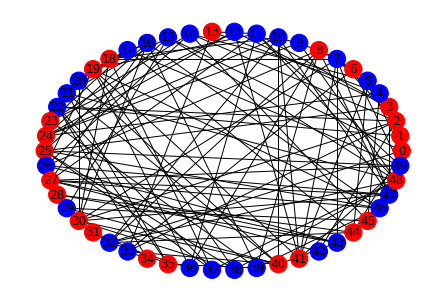

In [50]:
# запустим алгоритм, выведем найденное решение и начертим граф-решение
obj_arrange, nodes_arrange = flipcoin_maxcut(edge_count, node_count, weights)
print('flipcoin_maxcut = ', max(obj_arrange))
opt_nodes = nodes_arrange[obj_arrange.index(max(obj_arrange))]
color_map=[]
for node in G:
    if opt_nodes[node] == 1:
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw_circular(G,
         node_color = color_map,
         node_size = 300,
         with_labels = True)

3) Построим график работы алгоритма flipcoin_maxcut:

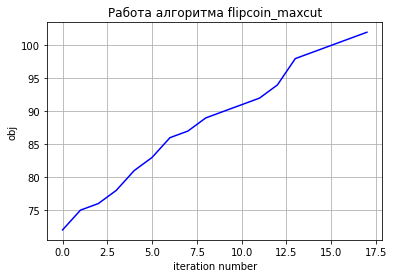

In [51]:
#начертим график работы алгоритма flipcoin_maxcut
plt.title('Работа алгоритма flipcoin_maxcut')

plt.xlabel('iteration number')
plt.ylabel('obj')
plt.grid()
plt.plot(obj_arrange, color='b')

### 7.2. SDP-релаксация задачи нахождения максимального разреза (SDP_MAXCUT)

***
Формальное описание задачи **MAXCUT**:<br>
Пусть $x_j=1$ для $j\in S$, $x_j=-1$ для $j\in \overline{S}$. Тогда:
$$MAXCUT:~\frac{1}{4}\sum_{i=1}^n\sum_{j=1}^n w_{ij}(1-x_ix_j) \rightarrow max_x$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n$$
***
Сделаем некоторые переобозначения и переобразования, чтобы записать задачу **MAXCUT** в матрицах.

Пусть $Y=xx^T$, тогда $Y_{ij}=x_i x_j,~i,j=1,...,n$. Также пусть $W$ - матрица весов, где на $(i,j)$-ом месте стоит $w_{ij}$. Тогда:
***
$$MAXCUT:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_{Y,x}$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n;~Y=xx^T$$
***
Очевидно, что в этой задаче 1-ое ограничение эквивалентно ограничению $Y{jj}=1,~j=1,...,n$. Таким образом, получаем:
***
$$MAXCUT:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_{Y,x}$$
$$s.t.~Y_{jj}=1,~j=1,...,n;~Y=xx^T$$
***
Наконец, очевидно, что матрица $Y=xx^T$ - симметричная положительно полуопределенная матрица ранга 1. Если мы ослабим(**relax**) это условие, удалив ограничение на ранг, мы получим следующую релаксацию $MAXCUT$, которая является полуопределенной программой($SDP$):
***
$$RELAX:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_Y$$
$$s.t.~Y_{jj}=1,~j=1,...,n;~Y\succeq 0$$
***
Легко видеть, что $RELAX$ обеспечивает верхнюю границу для $MAXCUT$, т.е.:
<br><br>
$$MAXCUT\leq RELAX.$$
<br>
Оказывается, что без труда можно доказать:
<br><br>
$$0.87856\cdot RELAX\leq MAXCUT\leq RELAX.$$
<br>
А это впечатляющий результат, так как он говорит, что значение полуопределенной релаксации гарантированно будет не более чем на $12%$ выше значения NP-трудной задачи $MAXCUT$.

1) Напишем реализацию описанного алгоритма релаксации:

In [118]:
edges, edge_count, node_count, weights = get_graph('data/gc_50_3')

def relax_maxcut(edge_count, node_count, weights):
    
    # целевая функция MAX-CUT
    def obj_func(nodes, weights):
        obj = 0
        for i in range(len(nodes)):
            for j in range(len(nodes)):
                obj += weights[i][j] * (1 - nodes[i] * nodes[j])
        return obj / 4
    
    a_array =[]
    for i in range(node_count):
        temp = np.zeros((node_count, node_count))
        temp[i][i] = 1
        a_array.append(temp)
    
    c = weights
    b = np.array([1 for i in range(node_count)])
    
    # задаем начальную точку(просто единичная матрица)
    x_0 = np.eye(node_count)
    print('1) Начальная допустимая точка:\n', x_0)
    print('Значение целевой функции: ', bullet(c, x_0))
    
    x_0, y_0, s_0, theta_0, beta = feasible_point(c, a_array, b, x_0, theta_0 = 1)
    print('2) Начальная строго-допустимая точка:\n', x_0, '\n', y_0, '\n', s_0)
    print('Значение целевой функции: ', bullet(c, x_0))
    print('Разрыв двойственности: ', bullet(x_0, s_0))
    print('Симметричность x_0: ', is_symmetric(x_0))
    print('Положительная определенность x_0: ', is_pos_def(x_0))
    
    x, y, s = sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon = 0.001)
    print('3) Точка с разрывом двойственности не больше 0.1:\n', x)
    print('Значение целевой функции: ', bullet(c, x))
    print('Разрыв двойственности: ', bullet(x, s))
    print(is_pos_def(x))
    print(is_symmetric(x))
    
    relax_obj = 0
    for i in range(node_count):
        for j in range(node_count):
            relax_obj += weights[i][j]
    relax_obj -= bullet(c,x)
    relax_obj = relax_obj / 4
    
        
    
    solution = np.zeros((node_count, node_count))
    for i in range(node_count):
        for j in range(node_count):
            if x[i][j] >= 0:
                solution[i][j] = 1
            else:
                solution[i][j] = -1
    print(solution)
    
    nodes = np.ones(node_count)
    obj = 0
    
    for i in range(node_count):
        temp = solution[i]
        if obj_func(temp, weights) > obj:
            nodes = temp
            obj = obj_func(temp, weights)
    print('sdp_nodes = ', nodes)
    print('sdp_obj = ', obj)
    print('relax_obj = ', relax_obj)
    
    
    return 0



 

relax_maxcut(edge_count, node_count, weights)


1) Начальная допустимая точка:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Значение целевой функции:  0.0
x= [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.          0.         ...  0.          0.
  -0.00755929]
 [ 0.          1.          0.         ... -0.00755929  0.
   0.        ]
 [ 0.          0.          1.         ... -0.00755929 -0.00755929
   0.        ]
 ...
 [ 0.         -0.00755929 -0.00755929 ...  1.          0.
   0.        ]
 [ 0.          0.         -0.00755929 ...  0.          1.
   0.        ]
 [-0.00755929  0.          0.         ...  0.          0.
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.00000000e+00  2.22859110e-04  3.42437101e-04 ...  4.51115316e

x= [[ 1.          0.01615972  0.0247986  ...  0.02017002 -0.00481792
  -0.09810543]
 [ 0.01615972  1.          0.00782717 ... -0.10466559  0.08171968
   0.01696258]
 [ 0.0247986   0.00782717  1.         ... -0.10884788 -0.11215987
   0.01870393]
 ...
 [ 0.02017002 -0.10466559 -0.10884788 ...  1.         -0.00263962
   0.05259509]
 [-0.00481792  0.08171968 -0.11215987 ... -0.00263962  1.
   0.03340753]
 [-0.09810543  0.01696258  0.01870393 ...  0.05259509  0.03340753
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.01890476  0.027749   ...  0.02115531 -0.00480549
  -0.10338442]
 [ 0.01890476  1.          0.00773989 ... -0.11294887  0.09362074
   0.01745878]
 [ 0.027749    0.00773989  1.         ... -0.11578629 -0.11925936
   0.01924052]
 ...
 [ 0.02115531 -0.11294887 -0.11578629 ...  1.         -0.00519421
   0.0587614 ]
 [-0.00480549  0.09362074 -0.11925936 ... -0.00519421  1.
   0.03725215]
 [-0.10338442  0.01745878  0.01924052 ...  0.0587614   0.03

x= [[ 1.          0.10456782  0.08085855 ... -0.0129046   0.02840807
  -0.17298683]
 [ 0.10456782  1.          0.01095974 ... -0.28041756  0.30775802
  -0.02844696]
 [ 0.08085855  0.01095974  1.         ... -0.2104575  -0.20380417
  -0.02637827]
 ...
 [-0.0129046  -0.28041756 -0.2104575  ...  1.         -0.08751525
   0.17474498]
 [ 0.02840807  0.30775802 -0.20380417 ... -0.08751525  1.
   0.08148733]
 [-0.17298683 -0.02844696 -0.02637827 ...  0.17474498  0.08148733
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.11387954  0.08561168 ... -0.01917152  0.03312737
  -0.17837191]
 [ 0.11387954  1.          0.01212986 ... -0.29420242  0.32280318
  -0.03552107]
 [ 0.08561168  0.01212986  1.         ... -0.21726788 -0.20912081
  -0.03410447]
 ...
 [-0.01917152 -0.29420242 -0.21726788 ...  1.         -0.09470696
   0.18502725]
 [ 0.03312737  0.32280318 -0.20912081 ... -0.09470696  1.
   0.08357853]
 [-0.17837191 -0.03552107 -0.03410447 ...  0.18502725  0.08

x= [[ 1.          0.27317758  0.16656393 ... -0.14746529  0.12055428
  -0.26545078]
 [ 0.27317758  1.          0.03196029 ... -0.4680259   0.49867328
  -0.15343833]
 [ 0.16656393  0.03196029  1.         ... -0.31804267 -0.29320438
  -0.20346259]
 ...
 [-0.14746529 -0.4680259  -0.31804267 ...  1.         -0.17545524
   0.34710091]
 [ 0.12055428  0.49867328 -0.29320438 ... -0.17545524  1.
   0.11714529]
 [-0.26545078 -0.15343833 -0.20346259 ...  0.34710091  0.11714529
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.2842096   0.17199236 ... -0.15719925  0.12700376
  -0.27116634]
 [ 0.2842096   1.          0.03304462 ... -0.47705109  0.50739582
  -0.16071229]
 [ 0.17199236  0.03304462  1.         ... -0.3244201  -0.29898721
  -0.21671034]
 ...
 [-0.15719925 -0.47705109 -0.3244201  ...  1.         -0.17893288
   0.35741736]
 [ 0.12700376  0.50739582 -0.29898721 ... -0.17893288  1.
   0.11985578]
 [-0.27116634 -0.16071229 -0.21671034 ...  0.35741736  0.11

x= [[ 1.          0.44364385  0.23917414 ... -0.30158207  0.22873653
  -0.34419918]
 [ 0.44364385  1.          0.04480233 ... -0.58122967  0.60753421
  -0.24932234]
 [ 0.23917414  0.04480233  1.         ... -0.41110173 -0.37896291
  -0.40797586]
 ...
 [-0.30158207 -0.58122967 -0.41110173 ...  1.         -0.21177234
   0.49232657]
 [ 0.22873653  0.60753421 -0.37896291 ... -0.21177234  1.
   0.16272113]
 [-0.34419918 -0.24932234 -0.40797586 ...  0.49232657  0.16272113
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.45367402  0.24241395 ... -0.3107001   0.23579747
  -0.34801368]
 [ 0.45367402  1.          0.04538487 ... -0.58643352  0.6125841
  -0.25390478]
 [ 0.24241395  0.04538487  1.         ... -0.41626799 -0.38359944
  -0.41952363]
 ...
 [-0.3107001  -0.58643352 -0.41626799 ...  1.         -0.2129928
   0.49995012]
 [ 0.23579747  0.6125841  -0.38359944 ... -0.2129928   1.
   0.16547703]
 [-0.34801368 -0.25390478 -0.41952363 ...  0.49995012  0.1654

x= [[ 1.          0.53595957  0.2629836  ... -0.38432916  0.29735752
  -0.37467856]
 [ 0.53595957  1.          0.0497703  ... -0.62413015  0.65008284
  -0.28721115]
 [ 0.2629836   0.0497703   1.         ... -0.45788599 -0.41938139
  -0.51033496]
 ...
 [-0.38432916 -0.62413015 -0.45788599 ...  1.         -0.21989723
   0.55894097]
 [ 0.29735752  0.65008284 -0.41938139 ... -0.21989723  1.
   0.18789788]
 [-0.37467856 -0.28721115 -0.51033496 ...  0.55894097  0.18789788
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.53941005  0.26362767 ... -0.38731439  0.30005094
  -0.37560843]
 [ 0.53941005  1.          0.049889   ... -0.62553681  0.65157523
  -0.28843489]
 [ 0.26362767  0.049889    1.         ... -0.45962942 -0.42086832
  -0.51399926]
 ...
 [-0.38731439 -0.62553681 -0.45962942 ...  1.         -0.22004132
   0.56130619]
 [ 0.30005094  0.65157523 -0.42086832 ... -0.22004132  1.
   0.18889185]
 [-0.37560843 -0.28843489 -0.51399926 ...  0.56130619  0.18

x= [[ 1.          0.58917233  0.27077794 ... -0.42987276  0.3401601
  -0.38740478]
 [ 0.58917233  1.          0.05169853 ... -0.64443132  0.67199645
  -0.30495177]
 [ 0.27077794  0.05169853  1.         ... -0.4846755  -0.44137223
  -0.56559971]
 ...
 [-0.42987276 -0.64443132 -0.4846755  ...  1.         -0.22130919
   0.59446861]
 [ 0.3401601   0.67199645 -0.44137223 ... -0.22130919  1.
   0.20292927]
 [-0.38740478 -0.30495177 -0.56559971 ...  0.59446861  0.20292927
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.59235173  0.27109748 ... -0.4325589   0.34280323
  -0.38805623]
 [ 0.59235173  1.          0.05182338 ... -0.64555424  0.67323507
  -0.30593821]
 [ 0.27109748  0.05182338  1.         ... -0.4862726  -0.44262173
  -0.56881958]
 ...
 [-0.4325589  -0.64555424 -0.4862726  ...  1.         -0.22134147
   0.59653034]
 [ 0.34280323  0.67323507 -0.44262173 ... -0.22134147  1.
   0.20380638]
 [-0.38805623 -0.30593821 -0.56881958 ...  0.59653034  0.203

x= [[ 1.          0.63786982  0.27383877 ... -0.47055263  0.38169737
  -0.39605681]
 [ 0.63786982  1.          0.05380033 ... -0.66061064  0.69017513
  -0.3192227 ]
 [ 0.27383877  0.05380033  1.         ... -0.50916722 -0.45970337
  -0.6139733 ]
 ...
 [-0.47055263 -0.66061064 -0.50916722 ...  1.         -0.22121813
   0.62536616]
 [ 0.38169737  0.69017513 -0.45970337 ... -0.22121813  1.
   0.21609196]
 [-0.39605681 -0.3192227  -0.6139733  ...  0.62536616  0.21609196
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.64075713  0.27389632 ... -0.4729328   0.38423053
  -0.39648176]
 [ 0.64075713  1.          0.05393988 ... -0.66150411  0.69120189
  -0.32001474]
 [ 0.27389632  0.05393988  1.         ... -0.51062374 -0.46073589
  -0.61678082]
 ...
 [-0.4729328  -0.66150411 -0.51062374 ...  1.         -0.22117502
   0.62715452]
 [ 0.38423053  0.69120189 -0.46073589 ... -0.22117502  1.
   0.21685398]
 [-0.39648176 -0.32001474 -0.61678082 ...  0.62715452  0.21

x= [[ 1.          0.68182876  0.27319335 ... -0.50639269  0.42110623
  -0.40149098]
 [ 0.68182876  1.          0.05615651 ... -0.67347336  0.70523223
  -0.33067471]
 [ 0.27319335  0.05615651  1.         ... -0.53145215 -0.47476385
  -0.65605608]
 ...
 [-0.50639269 -0.67347336 -0.53145215 ...  1.         -0.22013767
   0.65211215]
 [ 0.42110623  0.70523223 -0.47476385 ... -0.22013767  1.
   0.2274701 ]
 [-0.40149098 -0.33067471 -0.65605608 ...  0.65211215  0.2274701
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.68441781  0.27305299 ... -0.50847668  0.42348306
  -0.40174311]
 [ 0.68441781  1.          0.05631232 ... -0.67418313  0.70608178
  -0.33131017]
 [ 0.27305299  0.05631232  1.         ... -0.5327738  -0.47560687
  -0.65849297]
 ...
 [-0.50847668 -0.67418313 -0.5327738  ...  1.         -0.2200466
   0.65365657]
 [ 0.42348306  0.70608178 -0.47560687 ... -0.2200466   1.
   0.22812535]
 [-0.40174311 -0.33131017 -0.65849297 ...  0.65365657  0.2281

x= [[ 1.          0.72105042  0.26982279 ... -0.53763558  0.45776829
  -0.40453273]
 [ 0.72105042  1.          0.05875643 ... -0.68368764  0.71767881
  -0.33986798]
 [ 0.26982279  0.05875643  1.         ... -0.55162545 -0.4870106
  -0.69253488]
 ...
 [-0.53763558 -0.68368764 -0.55162545 ...  1.         -0.2184475
   0.67516688]
 [ 0.45776829  0.71767881 -0.4870106  ... -0.2184475   1.
   0.2372199 ]
 [-0.40453273 -0.33986798 -0.69253488 ...  0.67516688  0.2372199
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.72334785  0.26954174 ... -0.53944365  0.45995903
  -0.40466039]
 [ 0.72334785  1.          0.05892579 ... -0.68425105  0.71838026
  -0.34037864]
 [ 0.26954174  0.05892579  1.         ... -0.55281855 -0.48769314
  -0.69464447]
 ...
 [-0.53944365 -0.68425105 -0.55281855 ...  1.         -0.21832829
   0.67649529]
 [ 0.45995903  0.71838026 -0.48769314 ... -0.21832829  1.
   0.2377793 ]
 [-0.40466039 -0.34037864 -0.69464447 ...  0.67649529  0.23777

x= [[ 1.          0.75571669  0.26456815 ... -0.56465274  0.49132861
  -0.4058929 ]
 [ 0.75571669  1.          0.06153973 ... -0.69179353  0.72794565
  -0.34726538]
 [ 0.26456815  0.06153973  1.         ... -0.56979503 -0.49689817
  -0.7240901 ]
 ...
 [-0.56465274 -0.69179353 -0.56979503 ...  1.         -0.2164177
   0.69496366]
 [ 0.49132861  0.72794565 -0.49689817 ... -0.2164177   1.
   0.24552229]
 [-0.4058929  -0.34726538 -0.7240901  ...  0.69496366  0.24552229
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.75773859  0.26419343 ... -0.56621072  0.49331921
  -0.40593578]
 [ 0.75773859  1.          0.06171801 ... -0.69224048  0.7285236
  -0.34767703]
 [ 0.26419343  0.06171801  1.         ... -0.57086684 -0.49744756
  -0.72591359]
 ...
 [-0.56621072 -0.69224048 -0.57086684 ...  1.         -0.21628417
   0.69610214]
 [ 0.49331921  0.7285236  -0.49744756 ... -0.21628417  1.
   0.24599732]
 [-0.40593578 -0.34767703 -0.72591359 ...  0.69610214  0.2459

x= [[ 1.          0.78613399  0.25810202 ... -0.58787634  0.52166101
  -0.40613741]
 [ 0.78613399  1.          0.06442843 ... -0.69822126  0.73639736
  -0.35323936]
 [ 0.25810202  0.06442843  1.         ... -0.58608453 -0.5048411
  -0.75135468]
 ...
 [-0.58787634 -0.69822126 -0.58608453 ...  1.         -0.21423372
   0.7119047 ]
 [ 0.52166101  0.73639736 -0.5048411  ... -0.21423372  1.
   0.25255868]
 [-0.40613741 -0.35323936 -0.75135468 ...  0.7119047   0.25255868
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.78790238  0.25767015 ... -0.58921207  0.52344992
  -0.40612604]
 [ 0.78790238  1.          0.06461069 ... -0.69857547  0.73687264
  -0.35357258]
 [ 0.25767015  0.06461069  1.         ... -0.58704327 -0.50528148
  -0.75292963]
 ...
 [-0.58921207 -0.69857547 -0.58704327 ...  1.         -0.21409518
   0.7128773 ]
 [ 0.52344992  0.73687264 -0.50528148 ... -0.21409518  1.
   0.25296038]
 [-0.40612604 -0.35357258 -0.75292963 ...  0.7128773   0.252

x= [[ 1.          0.81267971  0.25093697 ... -0.60775249  0.54881106
  -0.40569085]
 [ 0.81267971  1.          0.06734664 ... -0.70331159  0.74334215
  -0.35808502]
 [ 0.25093697  0.06734664  1.         ... -0.60063096 -0.5111986
  -0.77489921]
 ...
 [-0.60775249 -0.70331159 -0.60063096 ...  1.         -0.21201858
   0.72635876]
 [ 0.54881106  0.74334215 -0.5111986  ... -0.21201858  1.
   0.25849954]
 [-0.40569085 -0.35808502 -0.77489921 ...  0.72635876  0.25849954
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.81421949  0.25047519 ... -0.60889359  0.55040548
  -0.40564749]
 [ 0.81421949  1.          0.06752847 ... -0.70359181  0.74373232
  -0.35835599]
 [ 0.25047519  0.06752847  1.         ... -0.60148553 -0.51155049
  -0.77625911]
 ...
 [-0.60889359 -0.70359181 -0.60148553 ...  1.         -0.21188108
   0.72718737]
 [ 0.55040548  0.74373232 -0.51155049 ... -0.21188108  1.
   0.25883809]
 [-0.40564749 -0.35835599 -0.77625911 ...  0.72718737  0.258

x= [[ 1.          0.83575939  0.24344974 ... -0.62471212  0.57293857
  -0.40485653]
 [ 0.83575939  1.          0.0702302  ... -0.70733434  0.7490395
  -0.36203418]
 [ 0.24344974  0.0702302   1.         ... -0.61357955 -0.5162724
  -0.79522917]
 ...
 [-0.62471212 -0.70733434 -0.61357955 ...  1.         -0.20985092
   0.73865978]
 [ 0.57293857  0.7490395  -0.5162724  ... -0.20985092  1.
   0.26349972]
 [-0.40485653 -0.36203418 -0.79522917 ...  0.73865978  0.26349972
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.83709607  0.24297771 ... -0.62568458  0.57435112
  -0.40479667]
 [ 0.83709607  1.          0.07040807 ... -0.70755546  0.74935934
  -0.36225561]
 [ 0.24297771  0.07040807  1.         ... -0.61433915 -0.51655283
  -0.79640349]
 ...
 [-0.62568458 -0.70755546 -0.61433915 ...  1.         -0.20971824
   0.73936412]
 [ 0.57435112  0.74935934 -0.51655283 ... -0.20971824  1.
   0.26378423]
 [-0.40479667 -0.36225561 -0.79640349 ...  0.73936412  0.2637

x= [[ 1.          0.8557764   0.2359089  ... -0.63915444  0.5942698
  -0.40384159]
 [ 0.8557764   1.          0.07302971 ... -0.71050372  0.75370688
  -0.36526839]
 [ 0.2359089   0.07302971  1.         ... -0.62507788 -0.52031122
  -0.81278761]
 ...
 [-0.63915444 -0.71050372 -0.62507788 ...  1.         -0.20777858
   0.7491068 ]
 [ 0.5942698   0.75370688 -0.52031122 ... -0.20777858  1.
   0.26769697]
 [-0.40384159 -0.36526839 -0.81278761 ...  0.7491068   0.26769697
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.85693465  0.23544043 ... -0.63998193  0.59551595
  -0.40377556]
 [ 0.85693465  1.          0.07320101 ... -0.71067757  0.75396871
  -0.36545022]
 [ 0.23544043  0.07320101  1.         ... -0.62575171 -0.52053413
  -0.81380208]
 ...
 [-0.63998193 -0.71067757 -0.62575171 ...  1.         -0.20765292
   0.74970441]
 [ 0.59551595  0.75396871 -0.52053413 ... -0.20765292  1.
   0.26793548]
 [-0.40377556 -0.36545022 -0.81380208 ...  0.74970441  0.267

x= [[ 1.          0.87311297  0.22850026 ... -0.65143911  0.61306204
  -0.402781  ]
 [ 0.87311297  1.          0.07570999 ... -0.71299038  0.75752567
  -0.36792987]
 [ 0.22850026  0.07570999  1.         ... -0.63527083 -0.52351774
  -0.82796014]
 ...
 [-0.65143911 -0.71299038 -0.63527083 ...  1.         -0.20582848
   0.75796474]
 [ 0.61306204  0.75752567 -0.52351774 ... -0.20582848  1.
   0.27121217]
 [-0.402781   -0.36792987 -0.82796014 ...  0.75796474  0.27121217
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.8741157   0.22804472 ... -0.65214273  0.61415831
  -0.40271532]
 [ 0.8741157   1.          0.07587297 ... -0.7131264   0.75773975
  -0.36807988]
 [ 0.22804472  0.07587297  1.         ... -0.63586774 -0.52369445
  -0.82883708]
 ...
 [-0.65214273 -0.7131264  -0.63586774 ...  1.         -0.20571102
   0.75847107]
 [ 0.61415831  0.75773975 -0.52369445 ... -0.20571102  1.
   0.2714117 ]
 [-0.40271532 -0.36807988 -0.82883708 ...  0.75847107  0.27

x= [[ 1.          0.88811964  0.22134792 ... -0.66188389  0.6295796
  -0.40175776]
 [ 0.88811964  1.          0.07824807 ... -0.71493076  0.7606466
  -0.37013022]
 [ 0.22134792  0.07824807  1.         ... -0.64429658 -0.52605608
  -0.84108063]
 ...
 [-0.66188389 -0.71493076 -0.64429658 ...  1.         -0.20401367
   0.76546613]
 [ 0.6295796   0.7606466  -0.52605608 ... -0.20401367  1.
   0.27415034]
 [-0.40175776 -0.37013022 -0.84108063 ...  0.76546613  0.27415034
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.88898757  0.2209114  ... -0.66248212  0.63054234
  -0.40169627]
 [ 0.88898757  1.          0.07840163 ... -0.71503651  0.76082146
  -0.37025454]
 [ 0.2209114   0.07840163  1.         ... -0.64482494 -0.52619572
  -0.84183933]
 ...
 [-0.66248212 -0.71503651 -0.64482494 ...  1.         -0.20390486
   0.7658947 ]
 [ 0.63054234  0.76082146 -0.52619572 ... -0.20390486  1.
   0.27431696]
 [-0.40169627 -0.37025454 -0.84183933 ...  0.7658947   0.2743

x= [[ 1.          0.90111072  0.21453084 ... -0.67076554  0.64407857
  -0.40081876]
 [ 0.90111072  1.          0.08063062 ... -0.71643424  0.76319451
  -0.37195739]
 [ 0.21453084  0.08063062  1.         ... -0.65228409 -0.52805865
  -0.8524371 ]
 ...
 [-0.67076554 -0.71643424 -0.65228409 ...  1.         -0.2023381
   0.77181342]
 [ 0.64407857  0.76319451 -0.52805865 ... -0.2023381   1.
   0.27660202]
 [-0.40081876 -0.37195739 -0.8524371  ...  0.77181342  0.27660202
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.90186227  0.21411711 ... -0.67127438  0.6449233
  -0.40076349]
 [ 0.90186227  1.          0.08077419 ... -0.71651581  0.76333719
  -0.37206087]
 [ 0.21411711  0.08077419  1.         ... -0.65275159 -0.52816858
  -0.85309416]
 ...
 [-0.67127438 -0.71651581 -0.65275159 ...  1.         -0.20223798
   0.77217594]
 [ 0.6449233   0.76333719 -0.52816858 ... -0.20223798  1.
   0.27674094]
 [-0.40076349 -0.37206087 -0.85309416 ...  0.77217594  0.2767

x= [[ 1.          0.91236358  0.20809552 ... -0.67832257  0.65679816
  -0.39998669]
 [ 0.91236358  1.          0.08285166 ... -0.71758875  0.76527256
  -0.37348101]
 [ 0.20809552  0.08285166  1.         ... -0.65935156 -0.52963211
  -0.86227729]
 ...
 [-0.67832257 -0.71758875 -0.65935156 ...  1.         -0.20079998
   0.77718163]
 [ 0.65679816  0.76527256 -0.52963211 ... -0.20079998  1.
   0.27864476]
 [-0.39998669 -0.37348101 -0.86227729 ...  0.77718163  0.27864476
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.91301487  0.20770662 ... -0.67875573  0.65753915
  -0.39993846]
 [ 0.91301487  1.          0.08298507 ... -0.71765102  0.76538886
  -0.37356749]
 [ 0.20770662  0.08298507  1.         ... -0.65976524 -0.52971825
  -0.86284698]
 ...
 [-0.67875573 -0.71765102 -0.65976524 ...  1.         -0.20070831
   0.77748819]
 [ 0.65753915  0.76538886 -0.52971825 ... -0.20070831  1.
   0.27876042]
 [-0.39993846 -0.37356749 -0.86284698 ...  0.77748819  0.27

x= [[ 1.          0.92212017  0.20206541 ... -0.68475891  0.66795632
  -0.3992686 ]
 [ 0.92212017  1.          0.08491056 ... -0.71846508  0.76696573
  -0.37475646]
 [ 0.20206541  0.08491056  1.         ... -0.66560594 -0.53086227
  -0.87081382]
 ...
 [-0.68475891 -0.71846508 -0.66560594 ...  1.         -0.19939405
   0.78172111]
 [ 0.66795632  0.76696573 -0.53086227 ... -0.19939405  1.
   0.28034462]
 [-0.3992686  -0.37475646 -0.87081382 ...  0.78172111  0.28034462
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.92268522  0.20170222 ... -0.68512808  0.66860644
  -0.39922748]
 [ 0.92268522  1.          0.08503391 ... -0.71851198  0.76706045
  -0.374829  ]
 [ 0.20170222  0.08503391  1.         ... -0.66597209 -0.53092942
  -0.87130838]
 ...
 [-0.68512808 -0.71851198 -0.66597209 ...  1.         -0.19931041
   0.78198036]
 [ 0.66860644  0.76706045 -0.53092942 ... -0.19931041  1.
   0.28044081]
 [-0.39922748 -0.374829   -0.87130838 ...  0.78198036  0.28

x= [[ 1.          0.93058985  0.19644785 ... -0.69024786  0.67774831
  -0.39866194]
 [ 0.93058985  1.          0.08681045 ... -0.71912026  0.768344
  -0.37582805]
 [ 0.19644785  0.08681045  1.         ... -0.67114293 -0.53181822
  -0.87822893]
 ...
 [-0.69024786 -0.71912026 -0.67114293 ...  1.         -0.19811303
   0.7855604 ]
 [ 0.67774831  0.768344   -0.53181822 ... -0.19811303  1.
   0.28175766]
 [-0.39866194 -0.37582805 -0.87822893 ...  0.7855604   0.28175766
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.93108073  0.19611041 ... -0.69056294  0.67831901
  -0.39862756]
 [ 0.93108073  1.          0.08692403 ... -0.71915496  0.76842106
  -0.37588911]
 [ 0.19611041  0.08692403  1.         ... -0.67146717 -0.53187019
  -0.87865883]
 ...
 [-0.69056294 -0.71915496 -0.67146717 ...  1.         -0.19803692
   0.78577969]
 [ 0.67831901  0.76842106 -0.53187019 ... -0.19803692  1.
   0.28183757]
 [-0.39862756 -0.37588911 -0.87865883 ...  0.78577969  0.2818

x= [[ 1.          0.93795274  0.19123915 ... -0.69493604  0.68634698
  -0.39815868]
 [ 0.93795274  1.          0.088557   ... -0.71960028  0.76946484
  -0.3767314 ]
 [ 0.19123915  0.088557    1.         ... -0.67604752 -0.53255551
  -0.88467858]
 ...
 [-0.69493604 -0.71960028 -0.67604752 ...  1.         -0.19694865
   0.78880885]
 [ 0.68634698  0.76946484 -0.53255551 ... -0.19694865  1.
   0.28293122]
 [-0.39815868 -0.3767314  -0.88467858 ...  0.78880885  0.28293122
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.93837983  0.19092696 ... -0.6952054   0.68684835
  -0.39813042]
 [ 0.93837983  1.          0.08866123 ... -0.71962535  0.76952747
  -0.37678296]
 [ 0.19092696  0.08866123  1.         ... -0.67633482 -0.5325954
  -0.88505278]
 ...
 [-0.6952054  -0.71962535 -0.67633482 ...  1.         -0.19687955
   0.78899446]
 [ 0.68684835  0.76952747 -0.5325954  ... -0.19687955  1.
   0.28299756]
 [-0.39813042 -0.37678296 -0.88505278 ...  0.78899446  0.282

x= [[ 1.          0.94436319  0.18642822 ... -0.6989471   0.69390404
  -0.39774806]
 [ 0.94436319  1.          0.0901575  ... -0.71994222  0.77037539
  -0.37749532]
 [ 0.18642822  0.0901575   1.         ... -0.68039473 -0.53311885
  -0.89029618]
 ...
 [-0.6989471  -0.71994222 -0.68039473 ...  1.         -0.19589229
   0.79155918]
 [ 0.69390404  0.77037539 -0.53311885 ... -0.19589229  1.
   0.28390517]
 [-0.39774806 -0.37749532 -0.89029618 ...  0.79155918  0.28390517
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.94473533  0.1861404  ... -0.69917778  0.69434489
  -0.3977252 ]
 [ 0.94473533  1.          0.09025287 ... -0.71995973  0.77042624
  -0.37753899]
 [ 0.1861404   0.09025287  1.         ... -0.68064947 -0.53314914
  -0.89062235]
 ...
 [-0.69917778 -0.71995973 -0.68064947 ...  1.         -0.19582966
   0.7917164 ]
 [ 0.69434489  0.77042624 -0.53314914 ... -0.19582966  1.
   0.28396021]
 [-0.3977252  -0.37753899 -0.89062235 ...  0.7917164   0.28

x= [[ 1.          0.94995308  0.18199923 ... -0.7023851   0.70055187
  -0.39741831]
 [ 0.94995308  1.          0.09162021 ... -0.72017596  0.77111433
  -0.37814322]
 [ 0.18199923  0.09162021  1.         ... -0.68425051 -0.53354419
  -0.89519578]
 ...
 [-0.7023851  -0.72017596 -0.68425051 ...  1.         -0.19493541
   0.79388978]
 [ 0.70055187  0.77111433 -0.53354419 ... -0.19493541  1.
   0.284713  ]
 [-0.39741831 -0.37814322 -0.89519578 ...  0.79388978  0.284713
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.95027786  0.18173468 ... -0.70258302  0.70093988
  -0.39740011]
 [ 0.95027786  1.          0.09170725 ... -0.72018755  0.77115557
  -0.37818032]
 [ 0.18173468  0.09170725  1.         ... -0.68447654 -0.53356688
  -0.89548047]
 ...
 [-0.70258302 -0.72018755 -0.68447654 ...  1.         -0.19487871
   0.79402307]
 [ 0.70093988  0.77115557 -0.53356688 ... -0.19487871  1.
   0.28475864]
 [-0.39740011 -0.37818032 -0.89548047 ...  0.79402307  0.2847

x= [[ 1.          0.95483497  0.17793344 ... -0.70533744  0.7064055
  -0.39715776]
 [ 0.95483497  1.          0.09295383 ... -0.72032553  0.7717133
  -0.37869422]
 [ 0.17793344  0.09295383  1.         ... -0.68767267 -0.53386043
  -0.89947489]
 ...
 [-0.70533744 -0.72032553 -0.68767267 ...  1.         -0.19406973
   0.7958667 ]
 [ 0.7064055   0.7717133  -0.53386043 ... -0.19406973  1.
   0.28538272]
 [-0.39715776 -0.37869422 -0.89947489 ...  0.7958667   0.28538272
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.95511886  0.17769092 ... -0.70550758  0.70674733
  -0.39714352]
 [ 0.95511886  1.          0.0930331  ... -0.72033255  0.77174671
  -0.37872581]
 [ 0.17769092  0.0930331   1.         ... -0.68787334 -0.53387713
  -0.89972371]
 ...
 [-0.70550758 -0.72033255 -0.68787334 ...  1.         -0.19401848
   0.79597983]
 [ 0.70674733  0.77174671 -0.53387713 ... -0.19401848  1.
   0.28542055]
 [-0.39714352 -0.37872581 -0.89972371 ...  0.79597983  0.2854

x= [[ 1.          0.95910486  0.17421055 ... -0.70787753  0.71156466
  -0.39695547]
 [ 0.95910486  1.          0.09416719 ... -0.72041025  0.77219823
  -0.37916399]
 [ 0.17421055  0.09416719  1.         ... -0.69071177 -0.53409081
  -0.90321687]
 ...
 [-0.70787753 -0.72041025 -0.69071177 ...  1.         -0.19328748
   0.79754555]
 [ 0.71156466  0.77219823 -0.53409081 ... -0.19328748  1.
   0.28593776]
 [-0.39695547 -0.37916399 -0.90321687 ...  0.79754555  0.28593776
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.95935335  0.17398878 ... -0.70802406  0.71186608
  -0.39694453]
 [ 0.95935335  1.          0.09423923 ... -0.72041377  0.77222525
  -0.37919096]
 [ 0.17398878  0.09423923  1.         ... -0.69089003 -0.53410281
  -0.9034346 ]
 ...
 [-0.70802406 -0.72041377 -0.69089003 ...  1.         -0.19324119
   0.79764169]
 [ 0.71186608  0.77222525 -0.53410281 ... -0.19324119  1.
   0.28596911]
 [-0.39694453 -0.37919096 -0.9034346  ...  0.79764169  0.28

x= [[ 1.          0.96284458  0.17080963 ... -0.71006697  0.71611563
  -0.39680152]
 [ 0.96284458  1.          0.09526899 ... -0.72044562  0.77259029
  -0.37956544]
 [ 0.17080963  0.09526899  1.         ... -0.69341199 -0.53425398
  -0.90649301]
 ...
 [-0.71006697 -0.72044562 -0.69341199 ...  1.         -0.19258137
   0.79897303]
 [ 0.71611563  0.77259029 -0.53425398 ... -0.19258137  1.
   0.28639765]
 [-0.39680152 -0.37956544 -0.90649301 ...  0.79897303  0.28639765
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.96306236  0.17060729 ... -0.71019339  0.71638164
  -0.3967933 ]
 [ 0.96306236  1.          0.09533434 ... -0.72044649  0.77261213
  -0.37958852]
 [ 0.17060729  0.09533434  1.         ... -0.69357042 -0.5342623
  -0.90668374]
 ...
 [-0.71019339 -0.72044649 -0.69357042 ...  1.         -0.19253961
   0.79905484]
 [ 0.71638164  0.77261213 -0.5342623  ... -0.19253961  1.
   0.28642362]
 [-0.3967933  -0.37958852 -0.90668374 ...  0.79905484  0.286

x= [[ 1.          0.96612395  0.16770978 ... -0.71195749  0.72013307
  -0.39668719]
 [ 0.96612395  1.          0.09626763 ... -0.72044402  0.77290682
  -0.37990924]
 [ 0.16770978  0.09626763  1.         ... -0.69581195 -0.53436488
  -0.90936431]
 ...
 [-0.71195749 -0.72044402 -0.69581195 ...  1.         -0.19194469
   0.80018837]
 [ 0.72013307  0.77290682 -0.53436488 ... -0.19194469  1.
   0.28677866]
 [-0.39668719 -0.37990924 -0.90936431 ...  0.80018837  0.28677866
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.96631503  0.16752556 ... -0.71206676  0.72036796
  -0.39668118]
 [ 0.96631503  1.          0.0963268  ... -0.72044293  0.77292443
  -0.37992903]
 [ 0.16752556  0.0963268   1.         ... -0.69595277 -0.53437036
  -0.90953156]
 ...
 [-0.71206676 -0.72044293 -0.69595277 ...  1.         -0.19190705
   0.80025806]
 [ 0.72036796  0.77292443 -0.53437036 ... -0.19190705  1.
   0.28680017]
 [-0.39668118 -0.37992903 -0.90953156 ...  0.80025806  0.28

x= [[ 1.          0.96900258  0.1648905  ... -0.71359257  0.72368149
  -0.3966049 ]
 [ 0.96900258  1.          0.09717112 ... -0.72041534  0.77316195
  -0.38020424]
 [ 0.1648905   0.09717112  1.         ... -0.69794536 -0.53443549
  -0.91188304]
 ...
 [-0.71359257 -0.72041534 -0.69794536 ...  1.         -0.19137125
   0.80122442]
 [ 0.72368149  0.77316195 -0.53443549 ... -0.19137125  1.
   0.28709428]
 [-0.3966049  -0.38020424 -0.91188304 ...  0.80122442  0.28709428
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.9691704   0.16472316 ... -0.71368715  0.72388901
  -0.39660067]
 [ 0.9691704   1.          0.0972246  ... -0.72041283  0.77317613
  -0.38022123]
 [ 0.16472316  0.0972246   1.         ... -0.69807054 -0.5344388
  -0.91202981]
 ...
 [-0.71368715 -0.72041283 -0.69807054 ...  1.         -0.19133738
   0.80128388]
 [ 0.72388901  0.77317613 -0.5344388  ... -0.19133738  1.
   0.2871121 ]
 [-0.39660067 -0.38022123 -0.91202981 ...  0.80128388  0.287

x= [[ 1.          0.97153146  0.16233207 ... -0.71500877  0.72681675
  -0.39654821]
 [ 0.97153146  1.          0.09798701 ... -0.7203674   0.77336724
  -0.3804578 ]
 [ 0.16233207  0.09798701  1.         ... -0.6998417  -0.53447539
  -0.91409399]
 ...
 [-0.71500877 -0.7203674  -0.6998417  ...  1.         -0.19085544
   0.80210877]
 [ 0.72681675  0.77336724 -0.53447539 ... -0.19085544  1.
   0.28735575]
 [-0.39654821 -0.3804578  -0.91409399 ...  0.80210877  0.28735575
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.97167894  0.1621804  ... -0.71509074  0.72700012
  -0.39654539]
 [ 0.97167894  1.          0.09803526 ... -0.72036392  0.77337864
  -0.38047242]
 [ 0.1621804   0.09803526  1.         ... -0.69995296 -0.53447704
  -0.91422286]
 ...
 [-0.71509074 -0.72036392 -0.69995296 ...  1.         -0.190825
   0.80215955]
 [ 0.72700012  0.77337864 -0.53447704 ... -0.190825    1.
   0.28737052]
 [-0.39654539 -0.38047242 -0.91422286 ...  0.80215955  0.2873

x= [[ 1.          0.97375424  0.16001565 ... -0.71623687  0.72958721
  -0.39651169]
 [ 0.97375424  1.          0.09872237 ... -0.72030641  0.77353211
  -0.38067605]
 [ 0.16001565  0.09872237  1.         ... -0.70152679 -0.53449219
  -0.91603561]
 ...
 [-0.71623687 -0.72030641 -0.70152679 ...  1.         -0.19039212
   0.80286451]
 [ 0.72958721  0.77353211 -0.53449219 ... -0.19039212  1.
   0.28757238]
 [-0.39651169 -0.38067605 -0.91603561 ...  0.80286451  0.28757238
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.97388389  0.1598785  ... -0.716308    0.72974924
  -0.39650997]
 [ 0.97388389  1.          0.09876581 ... -0.72030228  0.77354126
  -0.38068865]
 [ 0.1598785   0.09876581  1.         ... -0.70162563 -0.53449261
  -0.9161488 ]
 ...
 [-0.716308   -0.72030228 -0.70162563 ...  1.         -0.1903648
   0.80290794]
 [ 0.72974924  0.77354126 -0.53449261 ... -0.1903648   1.
   0.28758461]
 [-0.39650997 -0.38068865 -0.9161488  ...  0.80290794  0.287

x= [[ 1.          0.97570839  0.1579234  ... -0.71730289  0.73203484
  -0.39649082]
 [ 0.97570839  1.          0.09938378 ... -0.72023723  0.77366426
  -0.38086415]
 [ 0.1579234   0.09938378  1.         ... -0.70302326 -0.53449195
  -0.91774099]
 ...
 [-0.71730289 -0.72023723 -0.70302326 ...  1.         -0.18997661
   0.80351104]
 [ 0.73203484  0.77366426 -0.53449195 ... -0.18997661  1.
   0.28775187]
 [-0.39649082 -0.38086415 -0.91774099 ...  0.80351104  0.28775187
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.97582237  0.15779969 ... -0.71736465  0.73217796
  -0.39648995]
 [ 0.97582237  1.          0.0994228  ... -0.72023273  0.77367159
  -0.38087501]
 [ 0.15779969  0.0994228   1.         ... -0.703111   -0.53449149
  -0.9178404 ]
 ...
 [-0.71736465 -0.72023273 -0.703111   ...  1.         -0.18995213
   0.80354821]
 [ 0.73217796  0.77367159 -0.53449149 ... -0.18995213  1.
   0.28776201]
 [-0.39648995 -0.38087501 -0.9178404  ...  0.80354821  0.28

x= [[ 1.          0.97742615  0.15603851 ... -0.71822878  0.73419612
  -0.39648187]
 [ 0.97742615  1.          0.09997732 ... -0.72016364  0.77376996
  -0.3810264 ]
 [ 0.15603851  0.09997732  1.         ... -0.704351   -0.53447949
  -0.91923861]
 ...
 [-0.71822878 -0.72016364 -0.704351   ...  1.         -0.18960469
   0.80406462]
 [ 0.73419612  0.77376996 -0.53447949 ... -0.18960469  1.
   0.28790061]
 [-0.39648187 -0.3810264  -0.91923861 ...  0.80406462  0.28790061
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.97752632  0.15592723 ... -0.71828244  0.73432244
  -0.39648163]
 [ 0.97752632  1.          0.1000123  ... -0.72015897  0.77377581
  -0.38103577]
 [ 0.15592723  0.1000123   1.         ... -0.70442879 -0.53447839
  -0.9193259 ]
 ...
 [-0.71828244 -0.72015897 -0.70442879 ...  1.         -0.1895828
   0.80409646]
 [ 0.73432244  0.77377581 -0.53447839 ... -0.1895828   1.
   0.28790901]
 [-0.39648163 -0.38103577 -0.9193259  ...  0.80409646  0.287

x= [[ 1.          0.97893535  0.15434521 ... -0.71903319  0.73610285
  -0.39648179]
 [ 0.97893535  1.          0.10050864 ... -0.72008857  0.7738543
  -0.38116643]
 [ 0.15434521  0.10050864  1.         ... -0.70552751 -0.53445857
  -0.92055312]
 ...
 [-0.71903319 -0.72008857 -0.70552751 ...  1.         -0.18927248
   0.80453892]
 [ 0.73610285  0.7738543  -0.53445857 ... -0.18927248  1.
   0.28802389]
 [-0.39648179 -0.38116643 -0.92055312 ...  0.80453892  0.28802389
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.97902332  0.1542454  ... -0.7190798   0.73621422
  -0.39648202]
 [ 0.97902332  1.          0.1005399  ... -0.72008388  0.77385897
  -0.38117451]
 [ 0.1542454   0.1005399   1.         ... -0.70559638 -0.53445705
  -0.92062969]
 ...
 [-0.7190798  -0.72008388 -0.70559638 ...  1.         -0.18925296
   0.80456621]
 [ 0.73621422  0.77385897 -0.53445705 ... -0.18925296  1.
   0.28803086]
 [-0.39648202 -0.38117451 -0.92062969 ...  0.80456621  0.288

x= [[ 1.          0.98026009  0.15282869 ... -0.71973196  0.73778286
  -0.39648809]
 [ 0.98026009  1.          0.10098295 ... -0.72001422  0.77392146
  -0.3812873 ]
 [ 0.15282869  0.10098295  1.         ... -0.7065683  -0.53443216
  -0.92170583]
 ...
 [-0.71973196 -0.72001422 -0.7065683  ...  1.         -0.18897649
   0.80494544]
 [ 0.73778286  0.77392146 -0.53443216 ... -0.18897649  1.
   0.28812609]
 [-0.39648809 -0.3812873  -0.92170583 ...  0.80494544  0.28812609
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98033725  0.15273945 ... -0.71977245  0.73788091
  -0.39648865]
 [ 0.98033725  1.          0.10101081 ... -0.72000964  0.77392516
  -0.38129428]
 [ 0.15273945  0.10101081  1.         ... -0.70662916 -0.53443038
  -0.92177294]
 ...
 [-0.71977245 -0.72000964 -0.70662916 ...  1.         -0.18895912
   0.80496883]
 [ 0.73788091  0.77392516 -0.53443038 ... -0.18895912  1.
   0.28813186]
 [-0.39648865 -0.38129428 -0.92177294 ...  0.80496883  0.28

x= [[ 1.          0.98142134  0.15147504 ... -0.72033864  0.7392606
  -0.39649881]
 [ 0.98142134  1.          0.10140506 ... -0.71994224  0.77397479
  -0.38139162]
 [ 0.15147504  0.10140506  1.         ... -0.70748712 -0.53440255
  -0.92271533]
 ...
 [-0.72033864 -0.71994224 -0.70748712 ...  1.         -0.1887135
   0.80529387]
 [ 0.7392606   0.77397479 -0.53440255 ... -0.1887135   1.
   0.28821081]
 [-0.39649881 -0.38139162 -0.92271533 ...  0.80529387  0.28821081
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98148892  0.15139555 ... -0.72037377  0.73934674
  -0.39649959]
 [ 0.98148892  1.          0.10142981 ... -0.71993785  0.77397774
  -0.38139764]
 [ 0.15139555  0.10142981  1.         ... -0.70754078 -0.53440064
  -0.92277405]
 ...
 [-0.72037377 -0.71993785 -0.70754078 ...  1.         -0.18869809
   0.80531392]
 [ 0.73934674  0.77397774 -0.53440064 ... -0.18869809  1.
   0.28821559]
 [-0.39649959 -0.38139764 -0.92277405 ...  0.80531392  0.2882

x= [[ 1.          0.98243745  0.15027122 ... -0.72086482  0.74055764
  -0.39651237]
 [ 0.98243745  1.          0.10177945 ... -0.71987384  0.77401706
  -0.38148158]
 [ 0.15027122  0.10177945  1.         ... -0.70829626 -0.5343715
  -0.92359785]
 ...
 [-0.72086482 -0.71987384 -0.70829626 ...  1.         -0.18848057
   0.80559243]
 [ 0.74055764  0.77401706 -0.5343715  ... -0.18848057  1.
   0.28828105]
 [-0.39651237 -0.38148158 -0.92359785 ...  0.80559243  0.28828105
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98249652  0.15020067 ... -0.72089527  0.74063316
  -0.39651328]
 [ 0.98249652  1.          0.10180136 ... -0.7198697   0.77401939
  -0.38148677]
 [ 0.15020067  0.10180136  1.         ... -0.70834345 -0.53436954
  -0.92364913]
 ...
 [-0.72089527 -0.7198697  -0.70834345 ...  1.         -0.18846694
   0.80560959]
 [ 0.74063316  0.77401939 -0.53436954 ... -0.18846694  1.
   0.28828502]
 [-0.39651328 -0.38148677 -0.92364913 ...  0.80560959  0.288

x= [[ 1.          0.98332457  0.14920489 ... -0.72132052  0.74169319
  -0.39652753]
 [ 0.98332457  1.          0.10211028 ... -0.71980981  0.77405049
  -0.38155909]
 [ 0.14920489  0.10211028  1.         ... -0.70900676 -0.53434032
  -0.92436767]
 ...
 [-0.72132052 -0.71980981 -0.70900676 ...  1.         -0.18827499
   0.80584805]
 [ 0.74169319  0.77405049 -0.53434032 ... -0.18827499  1.
   0.28833929]
 [-0.39652753 -0.38155909 -0.92436767 ...  0.80584805  0.28833929
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98337606  0.14914254 ... -0.72134686  0.7417592
  -0.39652851]
 [ 0.98337606  1.          0.1021296  ... -0.71980597  0.77405232
  -0.38156356]
 [ 0.14914254  0.1021296   1.         ... -0.70904812 -0.53433839
  -0.92441234]
 ...
 [-0.72134686 -0.71980597 -0.70904812 ...  1.         -0.18826299
   0.80586274]
 [ 0.7417592   0.77405232 -0.53433839 ... -0.18826299  1.
   0.28834258]
 [-0.39652851 -0.38156356 -0.92441234 ...  0.80586274  0.288

x= [[ 1.          0.98409699  0.14826441 ... -0.72171442  0.74268439
  -0.39654336]
 [ 0.98409699  1.          0.10240144 ... -0.71975069  0.77407686
  -0.38162576]
 [ 0.14826441  0.10240144  1.         ... -0.70962859 -0.53431
  -0.92503742]
 ...
 [-0.72171442 -0.71975069 -0.70962859 ...  1.         -0.18809425
   0.80606668]
 [ 0.74268439  0.77407686 -0.53431    ... -0.18809425  1.
   0.28838757]
 [-0.39654336 -0.38162576 -0.92503742 ...  0.80606668  0.28838757
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98414175  0.14820956 ... -0.72173716  0.7427419
  -0.39654436]
 [ 0.98414175  1.          0.10241841 ... -0.71974717  0.77407831
  -0.3816296 ]
 [ 0.14820956  0.10241841  1.         ... -0.70966473 -0.53430815
  -0.92507622]
 ...
 [-0.72173716 -0.71974717 -0.70966473 ...  1.         -0.18808372
   0.80607924]
 [ 0.7427419   0.77407831 -0.53430815 ... -0.18808372  1.
   0.2883903 ]
 [-0.39654436 -0.3816296  -0.92507622 ...  0.80607924  0.288390

x= [[ 1.          0.98476747  0.14743871 ... -0.7220541   0.74354668
  -0.39655916]
 [ 0.98476747  1.          0.10265658 ... -0.71969675  0.77409764
  -0.381683  ]
 [ 0.14743871  0.10265658  1.         ... -0.71017084 -0.5342812
  -0.92561834]
 ...
 [-0.7220541  -0.71969675 -0.71017084 ...  1.         -0.18793601
   0.80625339]
 [ 0.74354668  0.77409764 -0.5342812  ... -0.18793601  1.
   0.28842759]
 [-0.39655916 -0.381683   -0.92561834 ...  0.80625339  0.28842759
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98480626  0.14739067 ... -0.72207369  0.74359662
  -0.39656013]
 [ 0.98480626  1.          0.10267141 ... -0.71969356  0.77409878
  -0.3816863 ]
 [ 0.14739067  0.10267141  1.         ... -0.71020228 -0.53427947
  -0.92565194]
 ...
 [-0.72207369 -0.71969356 -0.71020228 ...  1.         -0.18792681
   0.8062641 ]
 [ 0.74359662  0.77409878 -0.53427947 ... -0.18792681  1.
   0.28842985]
 [-0.39656013 -0.3816863  -0.92565194 ...  0.8062641   0.288

x= [[ 1.          0.98534747  0.14671725 ... -0.72234623  0.74429408
  -0.39657441]
 [ 0.98534747  1.          0.10287913 ... -0.71964808  0.77411399
  -0.38173203]
 [ 0.14671725  0.10287913  1.         ... -0.71064182 -0.5342544
  -0.92612053]
 ...
 [-0.72234623 -0.71964808 -0.71064182 ...  1.         -0.18779809
   0.80641253]
 [ 0.74429408  0.77411399 -0.5342544  ... -0.18779809  1.
   0.28846076]
 [-0.39657441 -0.38173203 -0.92612053 ...  0.80641253  0.28846076
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98538096  0.14667539 ... -0.72236305  0.74433727
  -0.39657533]
 [ 0.98538096  1.          0.10289204 ... -0.71964521  0.77411489
  -0.38173485]
 [ 0.14667539  0.10289204  1.         ... -0.71066906 -0.5342528
  -0.92614952]
 ...
 [-0.72236305 -0.71964521 -0.71066906 ...  1.         -0.18779009
   0.80642165]
 [ 0.74433727  0.77411489 -0.5342528  ... -0.18779009  1.
   0.28846263]
 [-0.39657533 -0.38173485 -0.92614952 ...  0.80642165  0.2884

x= [[ 1.          0.98584734  0.14609    ... -0.7225967   0.74493933
  -0.39658876]
 [ 0.98584734  1.          0.10307234 ... -0.71960459  0.77412685
  -0.38177391]
 [ 0.14609     0.10307234  1.         ... -0.71104917 -0.53422986
  -0.92655308]
 ...
 [-0.7225967  -0.71960459 -0.71104917 ...  1.         -0.18767843
   0.80654789]
 [ 0.74493933  0.77412685 -0.53422986 ... -0.18767843  1.
   0.28848823]
 [-0.39658876 -0.38177391 -0.92655308 ...  0.80654789  0.28848823
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98587614  0.14605371 ... -0.72261109  0.74497654
  -0.39658962]
 [ 0.98587614  1.          0.10308351 ... -0.71960204  0.77412755
  -0.38177632]
 [ 0.14605371  0.10308351  1.         ... -0.71107268 -0.5342284
  -0.92657799]
 ...
 [-0.72261109 -0.71960204 -0.71107268 ...  1.         -0.18767151
   0.80655564]
 [ 0.74497654  0.77412755 -0.5342284  ... -0.18767151  1.
   0.28848978]
 [-0.39658962 -0.38177632 -0.92657799 ...  0.80655564  0.288

x= [[ 1.          0.98627647  0.14554741 ... -0.72281074  0.74549409
  -0.39660199]
 [ 0.98627647  1.          0.10323925 ... -0.7195661   0.77413695
  -0.38180959]
 [ 0.14554741  0.10323925  1.         ... -0.71139996 -0.5342077
  -0.9269242 ]
 ...
 [-0.72281074 -0.7195661  -0.71139996 ...  1.         -0.18757511
   0.80666273]
 [ 0.74549409  0.77413695 -0.5342077  ... -0.18757511  1.
   0.28851098]
 [-0.39660199 -0.38180959 -0.9269242  ...  0.80666273  0.28851098
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98630114  0.1455161  ... -0.72282301  0.74552601
  -0.39660278]
 [ 0.98630114  1.          0.10324887 ... -0.71956385  0.77413751
  -0.38181163]
 [ 0.1455161   0.10324887  1.         ... -0.71142016 -0.5342064
  -0.92694553]
 ...
 [-0.72282301 -0.71956385 -0.71142016 ...  1.         -0.18756916
   0.80666929]
 [ 0.74552601  0.77413751 -0.5342064  ... -0.18756916  1.
   0.28851227]
 [-0.39660278 -0.38181163 -0.92694553 ...  0.80666929  0.2885

x= [[ 1.          0.98664339  0.14508041 ... -0.72299301  0.74596905
  -0.39661399]
 [ 0.98664339  1.          0.10338274 ... -0.71953232  0.7741449
  -0.38183988]
 [ 0.14508041  0.10338274  1.         ... -0.71170071 -0.53418795
  -0.92724136]
 ...
 [-0.72299301 -0.71953232 -0.71170071 ...  1.         -0.18748633
   0.80675991]
 [ 0.74596905  0.7741449  -0.53418795 ... -0.18748633  1.
   0.28852981]
 [-0.39661399 -0.38183988 -0.92724136 ...  0.80675991  0.28852981
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98666444  0.14505353 ... -0.72300345  0.74599632
  -0.3966147 ]
 [ 0.98666444  1.          0.103391   ... -0.71953036  0.77414534
  -0.38184161]
 [ 0.14505353  0.103391    1.         ... -0.71171799 -0.53418679
  -0.92725955]
 ...
 [-0.72300345 -0.71953036 -0.71171799 ...  1.         -0.18748123
   0.80676546]
 [ 0.74599632  0.77414534 -0.53418679 ... -0.18748123  1.
   0.28853087]
 [-0.3966147  -0.38184161 -0.92725955 ...  0.80676546  0.288

x= [[ 1.          0.98695585  0.14468045 ... -0.7231477   0.74637398
  -0.39662472]
 [ 0.98695585  1.          0.10350552 ... -0.71950292  0.77415116
  -0.38186552]
 [ 0.14468045  0.10350552  1.         ... -0.71195742 -0.53417053
  -0.92751134]
 ...
 [-0.7231477  -0.71950292 -0.71195742 ...  1.         -0.1874104
   0.80684192]
 [ 0.74637398  0.77415116 -0.53417053 ... -0.1874104   1.
   0.28854538]
 [-0.39662472 -0.38186552 -0.92751134 ...  0.80684192  0.28854538
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98697373  0.1446575  ... -0.72315654  0.74639717
  -0.39662534]
 [ 0.98697373  1.          0.10351256 ... -0.71950122  0.7741515
  -0.38186699]
 [ 0.1446575   0.10351256  1.         ... -0.71197213 -0.53416952
  -0.92752679]
 ...
 [-0.72315654 -0.71950122 -0.71197213 ...  1.         -0.18740605
   0.80684659]
 [ 0.74639717  0.7741515  -0.53416952 ... -0.18740605  1.
   0.28854626]
 [-0.39662534 -0.38186699 -0.92752679 ...  0.80684659  0.2885

x= [[ 1.          0.98722088  0.14433955 ... -0.72327852  0.74671778
  -0.39663418]
 [ 0.98722088  1.          0.10361008 ... -0.71947752  0.77415609
  -0.38188716]
 [ 0.14433955  0.10361008  1.         ... -0.71217561 -0.53415533
  -0.92774025]
 ...
 [-0.72327852 -0.71947752 -0.71217561 ...  1.         -0.18734576
   0.80691093]
 [ 0.74671778  0.77415609 -0.53415533 ... -0.18734576  1.
   0.28855826]
 [-0.39663418 -0.38188716 -0.92774025 ...  0.80691093  0.28855826
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98723602  0.14432003 ... -0.72328598  0.74673742
  -0.39663473]
 [ 0.98723602  1.          0.10361606 ... -0.71947606  0.77415636
  -0.38188839]
 [ 0.14432003  0.10361606  1.         ... -0.71218808 -0.53415445
  -0.92775332]
 ...
 [-0.72328598 -0.71947606 -0.71218808 ...  1.         -0.18734206
   0.80691486]
 [ 0.74673742  0.77415636 -0.53415445 ... -0.18734206  1.
   0.28855898]
 [-0.39663473 -0.38188839 -0.92775332 ...  0.80691486  0.28

x= [[ 1.          0.98744483  0.1440503  ... -0.72338877  0.74700853
  -0.39664245]
 [ 0.98744483  1.          0.10369873 ... -0.71945572  0.77415999
  -0.38190536]
 [ 0.1440503   0.10369873  1.         ... -0.71236029 -0.53414216
  -0.92793362]
 ...
 [-0.72338877 -0.71945572 -0.71236029 ...  1.         -0.18729097
   0.80696885]
 [ 0.74700853  0.77415999 -0.53414216 ... -0.18729097  1.
   0.28856889]
 [-0.39664245 -0.38190536 -0.92793362 ...  0.80696885  0.28856889
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.9874576   0.14403378 ... -0.72339505  0.74702511
  -0.39664293]
 [ 0.9874576   1.          0.10370379 ... -0.71945447  0.77416021
  -0.3819064 ]
 [ 0.14403378  0.10370379  1.         ... -0.71237082 -0.5341414
  -0.92794464]
 ...
 [-0.72339505 -0.71945447 -0.71237082 ...  1.         -0.18728784
   0.80697214]
 [ 0.74702511  0.77416021 -0.5341414  ... -0.18728784  1.
   0.28856949]
 [-0.39664293 -0.3819064  -0.92794464 ...  0.80697214  0.288

x= [[ 1.          0.98763339  0.1438059  ... -0.7234814   0.7472535
  -0.3966496 ]
 [ 0.98763339  1.          0.1037736  ... -0.71943713  0.77416308
  -0.38192063]
 [ 0.1438059   0.1037736   1.         ... -0.71251601 -0.53413085
  -0.92809638]
 ...
 [-0.7234814  -0.71943713 -0.71251601 ...  1.         -0.18724471
   0.80701734]
 [ 0.7472535   0.77416308 -0.53413085 ... -0.18724471  1.
   0.28857767]
 [-0.3966496  -0.38192063 -0.92809638 ...  0.80701734  0.28857767
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98764412  0.14379197 ... -0.72348667  0.74726744
  -0.39665001]
 [ 0.98764412  1.          0.10377786 ... -0.71943606  0.77416325
  -0.3819215 ]
 [ 0.14379197  0.10377786  1.         ... -0.71252487 -0.5341302
  -0.92810564]
 ...
 [-0.72348667 -0.71943606 -0.71252487 ...  1.         -0.18724207
   0.80702009]
 [ 0.74726744  0.77416325 -0.5341302  ... -0.18724207  1.
   0.28857816]
 [-0.39665001 -0.3819215  -0.92810564 ...  0.80702009  0.2885

x= [[ 1.          0.98779163  0.14360019 ... -0.72355899  0.7474592
  -0.39665574]
 [ 0.98779163  1.          0.10383657 ... -0.71942135  0.77416554
  -0.3819334 ]
 [ 0.14360019  0.10383657  1.         ... -0.71264685 -0.5341212
  -0.92823294]
 ...
 [-0.72355899 -0.71942135 -0.71264685 ...  1.         -0.1872058
   0.80705782]
 [ 0.7474592   0.77416554 -0.5341212  ... -0.1872058   1.
   0.28858491]
 [-0.39665574 -0.3819334  -0.92823294 ...  0.80705782  0.28858491
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98780062  0.14358849 ... -0.7235634   0.74747089
  -0.39665609]
 [ 0.98780062  1.          0.10384016 ... -0.71942045  0.77416567
  -0.38193413]
 [ 0.14358849  0.10384016  1.         ... -0.71265428 -0.53412065
  -0.9282407 ]
 ...
 [-0.7235634  -0.71942045 -0.71265428 ...  1.         -0.18720359
   0.80706012]
 [ 0.74747089  0.77416567 -0.53412065 ... -0.18720359  1.
   0.28858532]
 [-0.39665609 -0.38193413 -0.9282407  ...  0.80706012  0.28858

x= [[ 1.          0.98792402  0.14342765 ... -0.7236238   0.74763139
  -0.39666097]
 [ 0.98792402  1.          0.10388937 ... -0.71940803  0.7741675
  -0.38194406]
 [ 0.14342765  0.10388937  1.         ... -0.71275643 -0.53411302
  -0.92834717]
 ...
 [-0.7236238  -0.71940803 -0.71275643 ...  1.         -0.18717319
   0.80709155]
 [ 0.74763139  0.7741675  -0.53411302 ... -0.18717319  1.
   0.28859088]
 [-0.39666097 -0.38194406 -0.92834717 ...  0.80709155  0.28859088
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98793153  0.14341785 ... -0.72362748  0.74764116
  -0.39666127]
 [ 0.98793153  1.          0.10389237 ... -0.71940727  0.77416761
  -0.38194466]
 [ 0.14341785  0.10389237  1.         ... -0.71276265 -0.53411255
  -0.92835365]
 ...
 [-0.72362748 -0.71940727 -0.71276265 ...  1.         -0.18717133
   0.80709346]
 [ 0.74764116  0.77416761 -0.53411255 ... -0.18717133  1.
   0.28859122]
 [-0.39666127 -0.38194466 -0.92835365 ...  0.80709346  0.288

x= [[ 1.          0.98803449  0.14328339 ... -0.72367781  0.74777513
  -0.3966654 ]
 [ 0.98803449  1.          0.10393351 ... -0.71939683  0.77416906
  -0.38195293]
 [ 0.14328339  0.10393351  1.         ... -0.71284794 -0.53410611
  -0.92844247]
 ...
 [-0.72367781 -0.71939683 -0.71284794 ...  1.         -0.18714593
   0.8071196 ]
 [ 0.74777513  0.77416906 -0.53410611 ... -0.18714593  1.
   0.2885958 ]
 [-0.3966654  -0.38195293 -0.92844247 ...  0.8071196   0.2885958
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98804074  0.14327521 ... -0.72368087  0.74778327
  -0.39666566]
 [ 0.98804074  1.          0.10393601 ... -0.71939619  0.77416915
  -0.38195343]
 [ 0.14327521  0.10393601  1.         ... -0.71285313 -0.53410571
  -0.92844786]
 ...
 [-0.72368087 -0.71939619 -0.71285313 ...  1.         -0.18714438
   0.80712118]
 [ 0.74778327  0.77416915 -0.53410571 ... -0.18714438  1.
   0.28859608]
 [-0.39666566 -0.38195343 -0.92844786 ...  0.80712118  0.288

x= [[ 1.          0.98812644  0.14316309 ... -0.72372272  0.74789482
  -0.39666914]
 [ 0.98812644  1.          0.1039703  ... -0.71938745  0.77417032
  -0.3819603 ]
 [ 0.14316309  0.1039703   1.         ... -0.71292418 -0.5341003
  -0.92852178]
 ...
 [-0.72372272 -0.71938745 -0.71292418 ...  1.         -0.18712321
   0.80714287]
 [ 0.74789482  0.77417032 -0.5341003  ... -0.18712321  1.
   0.28859986]
 [-0.39666914 -0.3819603  -0.92852178 ...  0.80714287  0.28859986
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98813164  0.14315627 ... -0.72372526  0.74790159
  -0.39666935]
 [ 0.98813164  1.          0.10397238 ... -0.71938691  0.77417039
  -0.38196071]
 [ 0.14315627  0.10397238  1.         ... -0.71292849 -0.53409997
  -0.92852627]
 ...
 [-0.72372526 -0.71938691 -0.71292849 ...  1.         -0.18712192
   0.80714419]
 [ 0.74790159  0.77417039 -0.53409997 ... -0.18712192  1.
   0.28860009]
 [-0.39666935 -0.38196071 -0.92852627 ...  0.80714419  0.288

x= [[ 1.          0.98820283  0.14306301 ... -0.72375999  0.74799427
  -0.39667228]
 [ 0.98820283  1.          0.10400089 ... -0.71937961  0.77417133
  -0.38196641]
 [ 0.14306301  0.10400089  1.         ... -0.71298754 -0.53409544
  -0.92858766]
 ...
 [-0.72375999 -0.71937961 -0.71298754 ...  1.         -0.18710432
   0.80716216]
 [ 0.74799427  0.77417133 -0.53409544 ... -0.18710432  1.
   0.28860319]
 [-0.39667228 -0.38196641 -0.92858766 ...  0.80716216  0.28860319
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98820714  0.14305735 ... -0.7237621   0.74799989
  -0.39667246]
 [ 0.98820714  1.          0.10400262 ... -0.71937917  0.77417139
  -0.38196675]
 [ 0.14305735  0.10400262  1.         ... -0.71299112 -0.53409516
  -0.92859138]
 ...
 [-0.7237621  -0.71937917 -0.71299112 ...  1.         -0.18710325
   0.80716325]
 [ 0.74799989  0.77417139 -0.53409516 ... -0.18710325  1.
   0.28860338]
 [-0.39667246 -0.38196675 -0.92859138 ...  0.80716325  0.28

x= [[ 1.          0.98826616  0.14297993 ... -0.72379087  0.74807675
  -0.3966749 ]
 [ 0.98826616  1.          0.10402629 ... -0.71937309  0.77417215
  -0.38197147]
 [ 0.14297993  0.10402629  1.         ... -0.7130401  -0.53409138
  -0.92864227]
 ...
 [-0.72379087 -0.71937309 -0.7130401  ...  1.         -0.18708864
   0.80717811]
 [ 0.74807675  0.77417215 -0.53409138 ... -0.18708864  1.
   0.28860594]
 [-0.3966749  -0.38197147 -0.92864227 ...  0.80717811  0.28860594
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98826973  0.14297524 ... -0.72379261  0.7480814
  -0.39667505]
 [ 0.98826973  1.          0.10402772 ... -0.71937272  0.77417219
  -0.38197175]
 [ 0.14297524  0.10402772  1.         ... -0.71304307 -0.53409115
  -0.92864536]
 ...
 [-0.72379261 -0.71937272 -0.71304307 ...  1.         -0.18708775
   0.80717901]
 [ 0.7480814   0.77417219 -0.53409115 ... -0.18708775  1.
   0.2886061 ]
 [-0.39667505 -0.38197175 -0.92864536 ...  0.80717901  0.288

x= [[ 1.          0.98831859  0.14291109 ... -0.72381642  0.74814504
  -0.39667709]
 [ 0.98831859  1.          0.10404733 ... -0.71936767  0.77417281
  -0.38197565]
 [ 0.14291109  0.10404733  1.         ... -0.71308364 -0.534088
  -0.92868748]
 ...
 [-0.72381642 -0.71936767 -0.71308364 ...  1.         -0.18707565
   0.8071913 ]
 [ 0.74814504  0.77417281 -0.534088   ... -0.18707565  1.
   0.2886082 ]
 [-0.39667709 -0.38197565 -0.92868748 ...  0.8071913   0.2886082
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98832155  0.1429072  ... -0.72381786  0.7481489
  -0.39667721]
 [ 0.98832155  1.          0.10404852 ... -0.71936736  0.77417284
  -0.38197589]
 [ 0.1429072   0.10404852  1.         ... -0.7130861  -0.53408781
  -0.92869004]
 ...
 [-0.72381786 -0.71936736 -0.7130861  ...  1.         -0.18707491
   0.80719204]
 [ 0.7481489   0.77417284 -0.53408781 ... -0.18707491  1.
   0.28860833]
 [-0.39667721 -0.38197589 -0.92869004 ...  0.80719204  0.288608

x= [[ 1.          0.98836194  0.14285412 ... -0.72383753  0.74820152
  -0.39667891]
 [ 0.98836194  1.          0.10406474 ... -0.71936317  0.77417334
  -0.38197911]
 [ 0.14285412  0.10406474  1.         ... -0.71311964 -0.53408519
  -0.92872486]
 ...
 [-0.72383753 -0.71936317 -0.71311964 ...  1.         -0.1870649
   0.80720219]
 [ 0.74820152  0.77417334 -0.53408519 ... -0.1870649   1.
   0.28861006]
 [-0.39667891 -0.38197911 -0.92872486 ...  0.80720219  0.28861006
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98836438  0.14285091 ... -0.72383872  0.7482047
  -0.39667901]
 [ 0.98836438  1.          0.10406572 ... -0.71936292  0.77417337
  -0.3819793 ]
 [ 0.14285091  0.10406572  1.         ... -0.71312168 -0.53408504
  -0.92872697]
 ...
 [-0.72383872 -0.71936292 -0.71312168 ...  1.         -0.18706429
   0.8072028 ]
 [ 0.7482047   0.77417337 -0.53408504 ... -0.18706429  1.
   0.28861016]
 [-0.39667901 -0.3819793  -0.92872697 ...  0.8072028   0.2886

x= [[ 1.          0.98839774  0.14280704 ... -0.72385495  0.74824816
  -0.39668042]
 [ 0.98839774  1.          0.10407912 ... -0.71935945  0.77417377
  -0.38198196]
 [ 0.14280704  0.10407912  1.         ... -0.71314939 -0.53408287
  -0.92875573]
 ...
 [-0.72385495 -0.71935945 -0.71314939 ...  1.         -0.18705602
   0.80721117]
 [ 0.74824816  0.77417377 -0.53408287 ... -0.18705602  1.
   0.28861159]
 [-0.39668042 -0.38198196 -0.92875573 ...  0.80721117  0.28861159
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98839976  0.14280439 ... -0.72385593  0.74825079
  -0.39668051]
 [ 0.98839976  1.          0.10407993 ... -0.71935924  0.7741738
  -0.38198212]
 [ 0.14280439  0.10407993  1.         ... -0.71315106 -0.53408274
  -0.92875747]
 ...
 [-0.72385593 -0.71935924 -0.71315106 ...  1.         -0.18705552
   0.80721167]
 [ 0.74825079  0.7741738  -0.53408274 ... -0.18705552  1.
   0.28861167]
 [-0.39668051 -0.38198212 -0.92875747 ...  0.80721167  0.288

x= [[ 1.          0.98842727  0.14276818 ... -0.72386932  0.74828665
  -0.39668167]
 [ 0.98842727  1.          0.104091   ... -0.71935638  0.77417413
  -0.38198431]
 [ 0.14276818  0.104091    1.         ... -0.71317393 -0.53408095
  -0.92878119]
 ...
 [-0.72386932 -0.71935638 -0.71317393 ...  1.         -0.18704869
   0.80721857]
 [ 0.74828665  0.77417413 -0.53408095 ... -0.18704869  1.
   0.28861284]
 [-0.39668167 -0.38198431 -0.92878119 ...  0.80721857  0.28861284
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98842894  0.14276599 ... -0.72387013  0.74828882
  -0.39668174]
 [ 0.98842894  1.          0.10409166 ... -0.7193562   0.77417415
  -0.38198445]
 [ 0.14276599  0.10409166  1.         ... -0.71317531 -0.53408084
  -0.92878262]
 ...
 [-0.72387013 -0.7193562  -0.71317531 ...  1.         -0.18704828
   0.80721899]
 [ 0.74828882  0.77417415 -0.53408084 ... -0.18704828  1.
   0.28861291]
 [-0.39668174 -0.38198445 -0.92878262 ...  0.80721899  0.28

x= [[ 1.          0.98845162  0.14273612 ... -0.72388117  0.74831839
  -0.39668271]
 [ 0.98845162  1.          0.10410079 ... -0.71935383  0.77417441
  -0.38198625]
 [ 0.14273612  0.10410079  1.         ... -0.71319417 -0.53407936
  -0.92880218]
 ...
 [-0.72388117 -0.71935383 -0.71319417 ...  1.         -0.18704264
   0.80722467]
 [ 0.74831839  0.77417441 -0.53407936 ... -0.18704264  1.
   0.28861388]
 [-0.39668271 -0.38198625 -0.92880218 ...  0.80722467  0.28861388
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98845299  0.14273432 ... -0.72388184  0.74832017
  -0.39668277]
 [ 0.98845299  1.          0.10410134 ... -0.71935369  0.77417443
  -0.38198636]
 [ 0.14273432  0.10410134  1.         ... -0.71319531 -0.53407927
  -0.92880337]
 ...
 [-0.72388184 -0.71935369 -0.71319531 ...  1.         -0.1870423
   0.80722501]
 [ 0.74832017  0.77417443 -0.53407927 ... -0.1870423   1.
   0.28861393]
 [-0.39668277 -0.38198636 -0.92880337 ...  0.80722501  0.288

x= [[ 1.          0.98847168  0.1427097  ... -0.72389092  0.74834453
  -0.39668356]
 [ 0.98847168  1.          0.10410886 ... -0.71935174  0.77417465
  -0.38198784]
 [ 0.1427097   0.10410886  1.         ... -0.71321085 -0.53407804
  -0.92881948]
 ...
 [-0.72389092 -0.71935174 -0.71321085 ...  1.         -0.18703766
   0.80722969]
 [ 0.74834453  0.77417465 -0.53407804 ... -0.18703766  1.
   0.28861473]
 [-0.39668356 -0.38198784 -0.92881948 ...  0.80722969  0.28861473
   1.        ]]
Пол. определенность:  True
Симметричность:  True
x= [[ 1.          0.98847281  0.14270822 ... -0.72389147  0.748346
  -0.39668361]
 [ 0.98847281  1.          0.10410931 ... -0.71935162  0.77417466
  -0.38198794]
 [ 0.14270822  0.10410931  1.         ... -0.71321179 -0.53407797
  -0.92882045]
 ...
 [-0.72389147 -0.71935162 -0.71321179 ...  1.         -0.18703738
   0.80722997]
 [ 0.748346    0.77417466 -0.53407797 ... -0.18703738  1.
   0.28861477]
 [-0.39668361 -0.38198794 -0.92882045 ...  0.80722997  0.2886

0

In [120]:
flipcoin_maxcut(edge_count, node_count, weights)

flipcoin_nodes =  [-1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1]
flipcoin_obj =  225.0


1

## 7.3 Анализ полученных результатов